In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
from difflib import SequenceMatcher
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET
import utils
import experiments

In [2]:
basedir = "urdu-english"
translation_csvs = [f for f in os.listdir(basedir) if f[0] == "B"]
gold_csvs = [f for f in os.listdir(basedir) if f[0] == "m"]
# edit_csvs = [f for f in os.listdir(basedir) if f[0] == "e"]

In [3]:
pd.set_option('display.max_columns', 800)

In [4]:
def eat_csv(csvfile):
    df = pd.read_csv(csvfile, sep=",", error_bad_lines=False)
    item = []
    label = []
    worker = []
    hit = []
    doc = []
    seg = []
    itemID = []
    status = []
    for index, row in df.iterrows():
        workerID = row["WorkerId"]
        hitID = row["HITId"]
        docID = row["Input.document"]
        asval = row["AssignmentStatus"]
        for i in range(1, 21):
            try:
                if asval != "aRejected":
                    colitem = row["Input.seg" + str(i)]
                    collabel = row["Answer.translation" + str(i)]
                    item.append(colitem)
                    label.append(collabel)
                    worker.append(workerID)
                    hit.append(hitID)
                    doc.append(docID)
                    seg.append(i)
                    itemID.append(str(docID) + "_" + str(i))
                    status.append(asval)
            except:
                pass
    return pd.DataFrame({"item":item, "itemID":itemID, "label":label, "worker":worker, "doc":doc, "seg":seg, "status":status, "hit":hit})

In [5]:
def eat_gold_csv(csvfile):
    tree = ET.parse(csvfile)
    root = tree.getroot()
    itemID = []
    goldtext = []
    for doc in root.iter("doc"):
        docId = doc.get("docid")
        for seg in doc.iter("seg"):
            segId = seg.get("id")
            text = seg.text
            itemID.append(str(docId) + "_" + str(segId))
            goldtext.append(text)
    return pd.DataFrame({"itemID":itemID, "goldtext":goldtext})

In [6]:
# def eatgold(goldcsv):
#     return pd.read_csv(goldcsv, sep=",", error_bad_lines=False)
# gold = pd.concat([eatgold(basedir + "/" + csv) for csv in edit_csvs], sort=False)
# gold[gold["AssignmentId"]=="5YSZ0CCB9JRZQ2X9WSAZ"]

In [7]:
urdu_df = pd.concat([eat_csv(basedir + "/" + csv) for csv in translation_csvs])

In [8]:
urdu_df = urdu_df.sort_values(["doc", "seg", "itemID"])
urdu_df#[urdu_df.duplicated('doc')]

item  \
56                             فرانس کی تجویز کی حمایت   
57   کمیٹی کا اجلاس جمعہ کے روز پارلیمنٹ ہاؤس میں ک...   
58   اجلاس کے بعد میڈیا کے نمائندوں سے گفتگو کرتے ہ...   
59   انہوں نے اسرائیل کی طرف سے فسلطینیوں پر حملے ک...   
60   مشاہد حسین نے دنیا کے ممالک کے دوہرے معیار کو ...   
61   خارجہ امور کے بارے میں سینیٹ کی قائمہ کمیٹی کے...   
62   انہوں نے کہا کہ کمیٹی نے اس اُمید کا اظہار کیا...   
63   مشاہد حسین سید نے کہا کہ مسلم اُمہ اور مغرب کے...   
64   خارجہ امور کے وزیر مملکت ملک عماد خان نے کمیٹی...   
65   یہ ہنگامی اجلاس اسرائیل کی طرف سے فسلطین پر ہو...   
66   خارجہ امور کے وزیر مملکت نے کہا کہ فلسطین کا م...   
67   عرب ملکوں سے تعلق رکھنے والے دو صحافیوں نے بھی...   
68   اُدھر اسلام آباد میں انٹرنیشنل یونیورسٹی کے طل...   
69   مظاہرین نے بینرز اور کتبے بھی اُٹھا رکھے تھے ج...   
96                 فلو سے بچنے کے لئے ڈائٹنگ سے اجتناب   
97   امریکی سائنسدانوں کی یہ تحقیق چوہوں پر کئے گئے...   
98   تجربات سے یہ ثابت ہوا کہ کم کیلوریز والی خوراک...   
99   تحقیق نے اس پرانی کہاوت کو غلط ثابت کردیا ہے ک...   
100  سائنسدانوں کے مطابق بخار کے دوران خوب کھائیں پ...   
101  مشیگن سٹیٹ یونیورسٹی کے تحقیقات کاروں کا کہنا ...   
102  پروفیسر الزبتھ گارڈنر کے مطابق ڈائٹنگ کرنے وال...   
103  ان کا یہ بھی کہنا ہے کہ وہ افراد جو فلو کی ویک...   
17                 ’پہلا جوہری تجربہ 1990 میں کیا تھا‘   
18   تھامس ریڈ نے جو امریکہ کی لیور نیشنل لیبارٹری ...   
19   یہ کتاب ’نیوکلیئر ایکسپریس: بم کی سیاسی تاریخ ...   
20   تھامس ریڈ نے یوایس نیوز کو ایک انٹرویو میں کہا...   
21   تھامس ریڈ نے کہا کہ کئی وجوہات کی بنیاد پر انہ...   
22   وجوہات میں اس بم کا ڈیزائن اور چین کے سائنسدان...   
23   انہوں نے مزید کہا کہ یہی وجہ تھی کہ انیس سو اٹ...   
24   تھامس ریڈ نے یاد دلایا کہ انیس سو اکسٹھ میں رو...   
..                                                 ...   
82   اس موقع پراقوام متحدہ میں پاکستان کے سفیر عبدا...   
83   سابق وزیر اعظم محترمہ بینظیر بھٹو شہید کو یہ ا...   
230                                             -سمیر۔   
231                                             شکاگو۔   
232  یہ بات سچ ہے کہ انہیں شید کیا گیا لیکن ہمیں یہ...   
233                     لکین بعد میں بالکل چینج ہوگئیں   
234  لیکن یہ بھی سچ ہے کہ انہوں نے اپنی پارٹی کے سی...   
154  اقوام متحدہ کی سلامتی کونسل کے پینل نے حافظ مح...   
155  سلامتی کونسل کی القاعدہ اور طالبان سینکشنز کمی...   
156  اس کے علاوہ ایک سعودی باشندے محموداحمد بازیک ک...   
157  ان تنظیموں میں جماعت الدعوة ، پاسبان کشمیر،الر...   
158  رکن ممالک فوری طور پران شخصیات اور تنظیموں کے ...   
159                        انہیں مقدمات کا سامنا ہوگا۔   
160  کیا یہ پابندیاں بھارتی پروپیگنڈے کے زیر اثر تو...   
161  بھارت بغیر کسی ثبوت کے ممبئی حملوں کا الزام ان...   
162         کیا بھارت میں دہشت گرد تنظیمیں موجود نہیں؟   
163  ، کیا بھارت میں اقلیتوں پر ہونے والے مظالم سے ...   
164                       ہمیں اپنی رائے سے آگاہ کریں۔   
4    -جمی نور، کراچی، اس خبر سے قرآن کی یہ بات ثاب...   
5    لیکن جب تک لوہے کی کلہاڑی ملاکر دستہ نہیں لگتا...   
6    ہمارے حکمرانوں کو انداز یہی کچھ ہے وہ خفیہ طری...   
7                     اللہ ہمارے حکمرانوں کو ہدایت دے۔   
52   عید کا تہوارخوشیوں اور مسرتوں کا ترجمان ہوتا ہ...   
53   اس پر آشوب دور میں جب مہنگائی عروج پر ہو سیاسی...   
54   ہم بھی آپ کو بلاگ کے ذریعے ایک موقع فراہم کررہ...   
55   آپ عید کی مناسبت سے اشعار کے ذریعے بھی مبارکبا...   
92                                      -مرتضی جیلانی،   
93   کراچی، ہمارے حکمرانوں کو یہ بات سمجھ لینی چاہی...   
94   اگر جنگ ہوئی تو وہی پاکستان کے شانہ بشانہ لڑیں گے   
95   جب ان کی محبت کا احساس ہوگا، صرف احتجاجی سیاست...   

                                 itemID  \
56              BBC_URD_20090102.0020_1   
57              BBC_URD_20090102.0020_2   
58              BBC_URD_20090102.0020_3   
59              BBC_URD_20090102.0020_4   
60              BBC_URD_20090102.0020_5   
61              BBC_URD_20090102.0020_6   
62              BBC_URD_20090102.0020_7   
63              BBC_URD_20090102.0020_8   
64              BBC_URD_20090102.0020_9   
65             BBC_URD_2

In [9]:
urdu_df[["item","label","itemID","worker","doc","seg"]]

item  \
56                             فرانس کی تجویز کی حمایت   
57   کمیٹی کا اجلاس جمعہ کے روز پارلیمنٹ ہاؤس میں ک...   
58   اجلاس کے بعد میڈیا کے نمائندوں سے گفتگو کرتے ہ...   
59   انہوں نے اسرائیل کی طرف سے فسلطینیوں پر حملے ک...   
60   مشاہد حسین نے دنیا کے ممالک کے دوہرے معیار کو ...   
61   خارجہ امور کے بارے میں سینیٹ کی قائمہ کمیٹی کے...   
62   انہوں نے کہا کہ کمیٹی نے اس اُمید کا اظہار کیا...   
63   مشاہد حسین سید نے کہا کہ مسلم اُمہ اور مغرب کے...   
64   خارجہ امور کے وزیر مملکت ملک عماد خان نے کمیٹی...   
65   یہ ہنگامی اجلاس اسرائیل کی طرف سے فسلطین پر ہو...   
66   خارجہ امور کے وزیر مملکت نے کہا کہ فلسطین کا م...   
67   عرب ملکوں سے تعلق رکھنے والے دو صحافیوں نے بھی...   
68   اُدھر اسلام آباد میں انٹرنیشنل یونیورسٹی کے طل...   
69   مظاہرین نے بینرز اور کتبے بھی اُٹھا رکھے تھے ج...   
96                 فلو سے بچنے کے لئے ڈائٹنگ سے اجتناب   
97   امریکی سائنسدانوں کی یہ تحقیق چوہوں پر کئے گئے...   
98   تجربات سے یہ ثابت ہوا کہ کم کیلوریز والی خوراک...   
99   تحقیق نے اس پرانی کہاوت کو غلط ثابت کردیا ہے ک...   
100  سائنسدانوں کے مطابق بخار کے دوران خوب کھائیں پ...   
101  مشیگن سٹیٹ یونیورسٹی کے تحقیقات کاروں کا کہنا ...   
102  پروفیسر الزبتھ گارڈنر کے مطابق ڈائٹنگ کرنے وال...   
103  ان کا یہ بھی کہنا ہے کہ وہ افراد جو فلو کی ویک...   
17                 ’پہلا جوہری تجربہ 1990 میں کیا تھا‘   
18   تھامس ریڈ نے جو امریکہ کی لیور نیشنل لیبارٹری ...   
19   یہ کتاب ’نیوکلیئر ایکسپریس: بم کی سیاسی تاریخ ...   
20   تھامس ریڈ نے یوایس نیوز کو ایک انٹرویو میں کہا...   
21   تھامس ریڈ نے کہا کہ کئی وجوہات کی بنیاد پر انہ...   
22   وجوہات میں اس بم کا ڈیزائن اور چین کے سائنسدان...   
23   انہوں نے مزید کہا کہ یہی وجہ تھی کہ انیس سو اٹ...   
24   تھامس ریڈ نے یاد دلایا کہ انیس سو اکسٹھ میں رو...   
..                                                 ...   
82   اس موقع پراقوام متحدہ میں پاکستان کے سفیر عبدا...   
83   سابق وزیر اعظم محترمہ بینظیر بھٹو شہید کو یہ ا...   
230                                             -سمیر۔   
231                                             شکاگو۔   
232  یہ بات سچ ہے کہ انہیں شید کیا گیا لیکن ہمیں یہ...   
233                     لکین بعد میں بالکل چینج ہوگئیں   
234  لیکن یہ بھی سچ ہے کہ انہوں نے اپنی پارٹی کے سی...   
154  اقوام متحدہ کی سلامتی کونسل کے پینل نے حافظ مح...   
155  سلامتی کونسل کی القاعدہ اور طالبان سینکشنز کمی...   
156  اس کے علاوہ ایک سعودی باشندے محموداحمد بازیک ک...   
157  ان تنظیموں میں جماعت الدعوة ، پاسبان کشمیر،الر...   
158  رکن ممالک فوری طور پران شخصیات اور تنظیموں کے ...   
159                        انہیں مقدمات کا سامنا ہوگا۔   
160  کیا یہ پابندیاں بھارتی پروپیگنڈے کے زیر اثر تو...   
161  بھارت بغیر کسی ثبوت کے ممبئی حملوں کا الزام ان...   
162         کیا بھارت میں دہشت گرد تنظیمیں موجود نہیں؟   
163  ، کیا بھارت میں اقلیتوں پر ہونے والے مظالم سے ...   
164                       ہمیں اپنی رائے سے آگاہ کریں۔   
4    -جمی نور، کراچی، اس خبر سے قرآن کی یہ بات ثاب...   
5    لیکن جب تک لوہے کی کلہاڑی ملاکر دستہ نہیں لگتا...   
6    ہمارے حکمرانوں کو انداز یہی کچھ ہے وہ خفیہ طری...   
7                     اللہ ہمارے حکمرانوں کو ہدایت دے۔   
52   عید کا تہوارخوشیوں اور مسرتوں کا ترجمان ہوتا ہ...   
53   اس پر آشوب دور میں جب مہنگائی عروج پر ہو سیاسی...   
54   ہم بھی آپ کو بلاگ کے ذریعے ایک موقع فراہم کررہ...   
55   آپ عید کی مناسبت سے اشعار کے ذریعے بھی مبارکبا...   
92                                      -مرتضی جیلانی،   
93   کراچی، ہمارے حکمرانوں کو یہ بات سمجھ لینی چاہی...   
94   اگر جنگ ہوئی تو وہی پاکستان کے شانہ بشانہ لڑیں گے   
95   جب ان کی محبت کا احساس ہوگا، صرف احتجاجی سیاست...   

                                                 label  \
56                  France has supported the proposal.   
57   The Chairman of the Committee of the Summit,  ...   
58   After the meeting, Mushahid Hussain Syed said ...   
59   He said that the Israeli attack is a crime on ...   
60   Mushahid Hussain while criticizing the world t...   
61   The foreign affairs Minister in the Senate Sta...   
62   He said that the Committee expressed hope t

In [10]:
urdu_df = urdu_df.sort_values("itemID")
crowd_df = urdu_df[urdu_df.duplicated('itemID', keep=False)].dropna()
drop_rejected = True
if drop_rejected:
#     crowd_df = crowd_df[crowd_df["status"] == "Approved"]
    crowd_df = crowd_df[~crowd_df["label"].str.contains("sentence goes here.")]
print(crowd_df.shape)
crowd_df

(561, 8)


item  \
130                      مخلوط تعلیم پر پابندی: طالبان   
140                      مخلوط تعلیم پر پابندی: طالبان   
149      زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔   
139      زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔   
131  شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...   
141  شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...   
132  پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...   
142  پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...   
133  پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...   
143  پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...   
134  مقامی طالبان کی جانب سے خواتین کے شناختی کارڈ ...   
144  مقامی طالبان کی جانب سے خواتین کے شناختی کارڈ ...   
135  مقامی لوگوں کے مطابق طالبان کی جانب سے جاری ہو...   
145  مقامی لوگوں کے مطابق طالبان کی جانب سے جاری ہو...   
136  تاہم خط میں اس بات کا ذکر نہیں کیاگیا ہے کہ لڑ...   
146  تاہم خط میں اس بات کا ذکر نہیں کیاگیا ہے کہ لڑ...   
147  پمفلٹ کے مطابق اس اعلان کے بعد تعلیم حاصل کرنے...   
137  پمفلٹ کے مطابق اس اعلان کے بعد تعلیم حاصل کرنے...   
138  اس کے علاوہ ضلع بنوں میں پولیس کا کہنا ہے کہ ا...   
148  اس کے علاوہ ضلع بنوں میں پولیس کا کہنا ہے کہ ا...   
108                  140 سالہ، نو کلو وزنی لابسٹر آزاد   
109  ’جارج دی جائنٹ لابسٹر‘ کو دو ہفتے قبل ایک سمند...   
110  شہر کی سمندری خوراک کی کمپنی نے اسے سو ڈالر می...   
101  شہر کی سمندری خوراک کی کمپنی نے اسے سو ڈالر می...   
102  اور فوراً ہی لابسٹر کی تصاویر کو اپنی تشہیر کی...   
111  اور فوراً ہی لابسٹر کی تصاویر کو اپنی تشہیر کی...   
103  تاہم جانوروں کے تحفظ کے لیے کام کرنے والے ایک ...   
112  تاہم جانوروں کے تحفظ کے لیے کام کرنے والے ایک ...   
104  جارج کو کینیڈا میں سمندر سے پکڑا گیا تھا جس کے...   
113  جارج کو کینیڈا میں سمندر سے پکڑا گیا تھا جس کے...   
..                                                 ...   
69   آپ کے خیال میں عدنان سمیع پر ان کی اہلیہ کا ال...   
61   کہیں یہ الزام عدنان سمیع کو بدنام کرنے کی بھار...   
70   کہیں یہ الزام عدنان سمیع کو بدنام کرنے کی بھار...   
62                 اس بارے میں اپنی رائے سے آگاہ کریں۔   
71                 اس بارے میں اپنی رائے سے آگاہ کریں۔   
189  امریکی صدر جارج ڈبلیو بش نے اپنی الوداعی پریس ...   
190  میں نے بطور صدر حالات کے مطابق اور امریکی آئین...   
200  ، انہوں نے کہا امریکا کے دشمن آج بھی امریکا پر...   
191  ، انہوں نے کہا امریکا کے دشمن آج بھی امریکا پر...   
192  انہوں نے کہا کہ عراق سے وسیع پیمانے پر تباہی پ...   
201  انہوں نے کہا کہ عراق سے وسیع پیمانے پر تباہی پ...   
193  وائٹ ہاؤس میں اپنی آخری پریس کانفرنس سے خطاب ک...   
202  وائٹ ہاؤس میں اپنی آخری پریس کانفرنس سے خطاب ک...   
194  کیا آپ سمجھتے ہیں کہ اوباما وہ غلطیاں نہیں دہر...   
203  کیا آپ سمجھتے ہیں کہ اوباما وہ غلطیاں نہیں دہر...   
195  کیابش نے غلطیوں کا اعتراف کرنے میں تاخیر نہیں ...   
204  کیابش نے غلطیوں کا اعتراف کرنے میں تاخیر نہیں ...   
196          اوباما بش کی نصیحت پر عمل پیرا ہوسکیں گے؟   
205          اوباما بش کی نصیحت پر عمل پیرا ہوسکیں گے؟   
206                            اپنی رائے سے آگاہ کریں۔   
197                            اپنی رائے سے آگاہ کریں۔   
6                                    -زبیر خان، کراچی۔   
3                                    -زبیر خان، کراچی۔   
0                                    -زبیر خان، کراچی۔   
7    یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...   
4    یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...   
1    یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...   
2    جتنی بھی تنظیمیں جو فلسطین اور کشمیر میں موجود...   
8    جتنی بھی تنظیمیں جو فلسطین اور کشمیر میں موجود...   
5    جتنی بھی تنظیمیں جو فلسطین اور کشمیر میں موجود...   

                                 itemID  \
130             BBC_URD_20090104.0004_1   
140             BBC_URD_20090104.0004_1   
149            BBC_URD_20090104.0004_10   
139            BBC_URD_20090104.0004_10   
131             BBC_URD_20090104.0004_2   
141             BBC_URD_20090104.0004_2   
132             BBC_URD_20090104.0004_3   
142             BBC_URD_20090104.0004_3   
133             BBC_URD_20090104.0004_4   
143             BBC_URD

In [11]:
crowd_df.shape

(561, 8)

In [12]:
uiddict = utils.make_categorical(crowd_df, "worker")
itemdict = utils.make_categorical(crowd_df, "itemID")

In [13]:
gold_df = pd.concat([eat_gold_csv(basedir + "/" + csv) for csv in gold_csvs])
# gold_df[gold_df["itemID"]=="BBC_URD_20090104.0004_1"]

In [14]:
gold_df = utils.translate_categorical(gold_df, "itemID", itemdict)
assert len(gold_df) > 0
# de-duplicate!10

In [15]:
def listize(data):
    return data["goldtext"].values
golddict = gold_df.groupby("itemID").apply(listize).to_dict()

In [16]:
from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu
from nltk.translate.gleu_score import sentence_gleu

smoother = SmoothingFunction()

def bleu(x, y):
    return sentence_bleu([x.split(" ")], y.split(" "), smoothing_function=smoother.method4)

def bleu2way(x, y):
    return (bleu(x, y) + bleu(y, x)) / 2

def bleu_multi(x, y):
    return sentence_bleu([xx.split(" ") for xx in x], y.split(" "), smoothing_function=smoother.method4)

def gleu(x, y):
    return sentence_gleu([x.split(" ")], y.split(" "))

def gleu2way(x, y):
    return (gleu(x, y) + gleu(y, x)) / 2

def gleu_multi(x, y):
    return sentence_gleu([xx.split(" ") for xx in x], y.split(" "))

def textdistance(a, b):
    try:
        return SequenceMatcher(None, a, b).ratio()
    except e:
        print(e)
        print(a, " vs ", b)

In [22]:
stan_data = utils.calc_distances(crowd_df, lambda x,y: 1 - gleu2way(x,y), label_colname="label", item_colname="itemID", uid_colname="worker")


100%|██████████| 293/293 [00:00<00:00, 531.50it/s]


In [130]:
crowd_df

item  itemID  \
130                      مخلوط تعلیم پر پابندی: طالبان       0   
140                      مخلوط تعلیم پر پابندی: طالبان       0   
149      زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔       1   
139      زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔       1   
131  شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...       2   
141  شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...       2   
132  پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...       3   
142  پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...       3   
133  پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...       4   
143  پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...       4   
134  مقامی طالبان کی جانب سے خواتین کے شناختی کارڈ ...       5   
144  مقامی طالبان کی جانب سے خواتین کے شناختی کارڈ ...       5   
135  مقامی لوگوں کے مطابق طالبان کی جانب سے جاری ہو...       6   
145  مقامی لوگوں کے مطابق طالبان کی جانب سے جاری ہو...       6   
136  تاہم خط میں اس بات کا ذکر نہیں کیاگیا ہے کہ لڑ...       7   
146  تاہم خط میں اس بات کا ذکر نہیں کیاگیا ہے کہ لڑ...       7   
147  پمفلٹ کے مطابق اس اعلان کے بعد تعلیم حاصل کرنے...       8   
137  پمفلٹ کے مطابق اس اعلان کے بعد تعلیم حاصل کرنے...       8   
138  اس کے علاوہ ضلع بنوں میں پولیس کا کہنا ہے کہ ا...       9   
148  اس کے علاوہ ضلع بنوں میں پولیس کا کہنا ہے کہ ا...       9   
108                  140 سالہ، نو کلو وزنی لابسٹر آزاد      10   
109  ’جارج دی جائنٹ لابسٹر‘ کو دو ہفتے قبل ایک سمند...      11   
110  شہر کی سمندری خوراک کی کمپنی نے اسے سو ڈالر می...      12   
101  شہر کی سمندری خوراک کی کمپنی نے اسے سو ڈالر می...      12   
102  اور فوراً ہی لابسٹر کی تصاویر کو اپنی تشہیر کی...      13   
111  اور فوراً ہی لابسٹر کی تصاویر کو اپنی تشہیر کی...      13   
103  تاہم جانوروں کے تحفظ کے لیے کام کرنے والے ایک ...      14   
112  تاہم جانوروں کے تحفظ کے لیے کام کرنے والے ایک ...      14   
104  جارج کو کینیڈا میں سمندر سے پکڑا گیا تھا جس کے...      15   
113  جارج کو کینیڈا میں سمندر سے پکڑا گیا تھا جس کے...      15   
..                                                 ...     ...   
69   آپ کے خیال میں عدنان سمیع پر ان کی اہلیہ کا ال...     278   
61   کہیں یہ الزام عدنان سمیع کو بدنام کرنے کی بھار...     279   
70   کہیں یہ الزام عدنان سمیع کو بدنام کرنے کی بھار...     279   
62                 اس بارے میں اپنی رائے سے آگاہ کریں۔     280   
71                 اس بارے میں اپنی رائے سے آگاہ کریں۔     280   
189  امریکی صدر جارج ڈبلیو بش نے اپنی الوداعی پریس ...     281   
190  میں نے بطور صدر حالات کے مطابق اور امریکی آئین...     282   
200  ، انہوں نے کہا امریکا کے دشمن آج بھی امریکا پر...     283   
191  ، انہوں نے کہا امریکا کے دشمن آج بھی امریکا پر...     283   
192  انہوں نے کہا کہ عراق سے وسیع پیمانے پر تباہی پ...     284   
201  انہوں نے کہا کہ عراق سے وسیع پیمانے پر تباہی پ...     284   
193  وائٹ ہاؤس میں اپنی آخری پریس کانفرنس سے خطاب ک...     285   
202  وائٹ ہاؤس میں اپنی آخری پریس کانفرنس سے خطاب ک...     285   
194  کیا آپ سمجھتے ہیں کہ اوباما وہ غلطیاں نہیں دہر...     286   
203  کیا آپ سمجھتے ہیں کہ اوباما وہ غلطیاں نہیں دہر...     286   
195  کیابش نے غلطیوں کا اعتراف کرنے میں تاخیر نہیں ...     287   
204  کیابش نے غلطیوں کا اعتراف کرنے میں تاخیر نہیں ...     287   
196          اوباما بش کی نصیحت پر عمل پیرا ہوسکیں گے؟     288   
205          اوباما بش کی نصیحت پر عمل پیرا ہوسکیں گے؟     288   
206                            اپنی رائے سے آگاہ کریں۔     289   
197                            اپنی رائے سے آگاہ کریں۔     289   
6                                    -زبیر خان، کراچی۔     290   
3                                    -زبیر خان، کراچی۔     290   
0                                    -زبیر خان، کراچی۔     290   
7    یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...     291   
4    یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...     291   
1    یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...     291   
2    جتنی بھی تنظیمیں جو فلسطین اور کشمیر میں موجود...     292   
8    جتنی بھی تنظیمیں جو فلسطین اور کشمیر میں موجود...     292   
5    جتنی بھی تنظیمیں جو

In [22]:
idf = crowd_df[crowd_df.itemID==292]
idf

item  itemID  \
2  جتنی بھی تنظیمیں جو فلسطین اور کشمیر میں موجود...     292   
8  جتنی بھی تنظیمیں جو فلسطین اور کشمیر میں موجود...     292   
5  جتنی بھی تنظیمیں جو فلسطین اور کشمیر میں موجود...     292   

                                               label  worker  \
2  All the organizations present in Kashmir and P...      20   
8  All the groups that are in Kashmir and Palesti...      19   
5  All the organizations operating in Palestine a...      12   

                                doc  seg    status                   hit  
2  urd-WL-86-174276-11370253-post10    3  Approved  99GYSJZ2DVZZ0YZV39VZ  
8  urd-WL-86-174276-11370253-post10    3  Approved  99GYSJZ2DVZZ0YZV39VZ  
5  urd-WL-86-174276-11370253-post10    3  Approved  99GYSJZ2DVZZ0YZV39VZ

In [23]:
print(1 - gleu2way(idf[idf.worker==12]["label"].values[0], idf[idf.worker==19]["label"].values[0]))
print(1 - gleu2way(idf[idf.worker==12]["label"].values[0], idf[idf.worker==20]["label"].values[0]))
print(1 - gleu2way(idf[idf.worker==20]["label"].values[0], idf[idf.worker==19]["label"].values[0]))

0.8333333333333334
0.7173913043478262
0.873015873015873


In [72]:
golddict.get(urdu_experiment.supervised_items[13])

array(['Now Hamas and Israel should make peace so that this bloodshed comes to an end.',
       'Hamas and Israel should now reconcile so that bloodshed is stopped.',
       'Hamas and Israel should now enter into reconciliation in order to end the cycle of bloodshed.',
       'Now Hamas and Israel should make peace so that this bloodshed comes to an end.',
       'Hamas and Israel should strike peace now so that the bloodshed may stop.',
       'Hamas and Israel should now enter into reconciliation in order to end the cycle of bloodshed.',
       'Hamas and Israel should now reconcile so that bloodshed is stopped.',
       'Hamas and Israel should strike peace now so that the bloodshed may stop.',
       'Hamas and Israel should now enter into reconciliation in order to end the cycle of bloodshed.',
       'Now Hamas and Israel should make peace so that this bloodshed comes to an end.',
       'Hamas and Israel should now reconcile so that bloodshed is stopped.',
       'Hamas and Isr

In [88]:
urdu_experiment.annodf.set_index("itemID").loc[urdu_experiment.supervised_items[13]]["label"].values

array(['Now Hamas and Israel should make peace so that this bloodshed comes to an end.',
       'Hamas and Israel should reconcile so that this bloodshed comes to an end.',
       'Now that the Hamas and Israel should be made to compromise, so the blood and evil.',
       'Now the Hamas and Israel should be لينی compromise so that the blood and evil.'],
      dtype=object)

In [80]:
pd.DataFrame(urdu_experiment.stan_data).set_index("items").loc[168]

u1s  u2s  distances  NDATA  NITEMS  NUSERS  n_gold_users  \
items                                                             
168      1    2   0.433333    370     293      26             1   
168      1    4   0.858621    370     293      26             1   
168      1    7   0.840741    370     293      26             1   
168      2    4   0.875862    370     293      26             1   
168      2    7   0.859259    370     293      26             1   
168      4    7   0.548276    370     293      26             1   

       gold_user_err  use_diff  use_disc  use_norm  norm_ratio  DIM_SIZE  \
items                                                                      
168               -4         0         1         1           1         8   
168               -4         0         1         1           1         8   
168               -4         0         1         1           1         8   
168               -4         0         1         1           1         8   
168               -4         0         1         1           1         8   
168               -4         0         1         1           1         8   

       eps_limit  uerr_prior_scale  diff_prior_scale  disc_prior_scale  \
items                                                                    
168            3                 1                 1                 1   
168            3                 1                 1                 1   
168            3                 1                 1                 1   
168            3                 1                 1                 1   
168            3                 1                 1                 1   
168            3                 1                 1                 1   

       uerr_prior_loc_scale  diff_prior_loc_scale  disc_prior_loc_scale  \
items                                                                     
168                       8                     8                     8   
168                       8                     8                     8   
168                       8                     8                     8   
168                       8                     8                     8   
168                       8                     8                     8   
168                       8                     8                     8   

       err_scale  
items             
168          0.1  
168          0.1  
168          0.1  
168          0.1  
168          0.1  
168          0.1

In [93]:
stan_model = utils.stanmodel("mas", overwrite=False)

Pickled model loaded


In [94]:
# stan_data["use_diff"] = 0
# stan_data["use_disc"] = 1
# stan_data["use_norm"] = 1
# stan_data["norm_ratio"] = 1
# stan_data["eps_limit"] = 1
# stan_data["uerr_prior_scale"] = 1
# stan_data["diff_prior_scale"] = 1
# stan_data["disc_prior_scale"] = 1
# stan_data["DIM_SIZE"] = 8

stan_data["use_diff"] = 0
stan_data["use_disc"] = 1
stan_data["use_norm"] = 1
# stan_data["norm_ratio"] = 0.5
stan_data["norm_ratio"] = 1
# stan_data["eps_limit"] = 1
stan_data["eps_limit"] = 3
stan_data["uerr_prior_scale"] = 1
stan_data["diff_prior_scale"] = 1
stan_data["disc_prior_scale"] = 1
stan_data["DIM_SIZE"] = 8
stan_data["err_scale"] = 0.1
opt = stan_model.optimizing(data=stan_data,verbose=True,iter=1500)

In [95]:
# fit = stan_model.sampling(data=stan_data,verbose=True,iter=500)

In [96]:
# samples = fit.extract()

In [97]:
# samples.keys()

In [98]:
# plt.scatter(samples["disc_Z"][:,12], samples["uerr_Z"][:,11])
# plt.show()

In [99]:
# i = 11
# plt.scatter(samples["item_user_errors_Z"].mean(axis=(2,3))[:,i], samples["disc"][:,i])
# plt.show()

In [100]:
# u = 11
# plt.scatter(samples["item_user_errors_Z"].mean(axis=(1,3))[:,u], samples["uerr"][:,u])
# plt.show()

In [101]:
# samples["dist_from_truth"].mean(axis=0).shape

In [102]:
# sddf = pd.DataFrame(stan_data)
# n1 = sddf.groupby(["u1s", "items"]).count()["distances"].groupby("u1s").count()
# plt.hist(n1)
# plt.show()

In [103]:
# (n1.values / 191).mean()

In [104]:
stan_data["NUSERS"], stan_data["NITEMS"]

(25, 293)

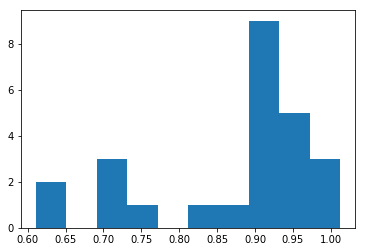

In [105]:
plt.hist(experiments.uerr_baseline(stan_data));plt.show()

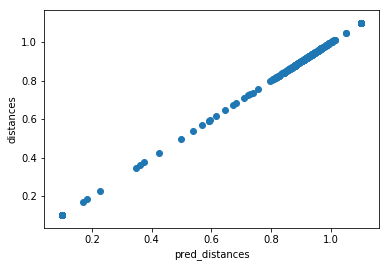

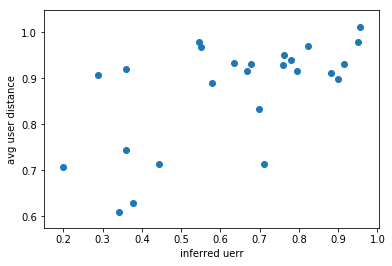

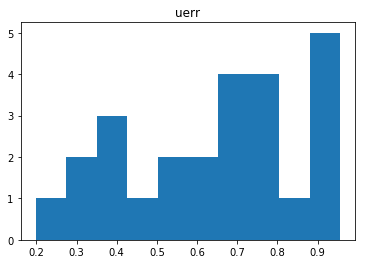

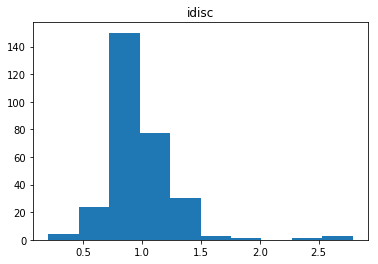

In [106]:
plt.scatter(opt["pred_distances"], stan_data["distances"])
plt.xlabel("pred_distances")
plt.ylabel("distances")
plt.show()
uerr_b = experiments.uerr_baseline(stan_data)
plt.scatter(opt["uerr"], uerr_b)
plt.xlabel("inferred uerr")
plt.ylabel("avg user distance")
plt.show()
plt.title("uerr")
plt.hist(opt["uerr"])
plt.show()
plt.title("idisc")
plt.hist(opt["disc"])
plt.show()

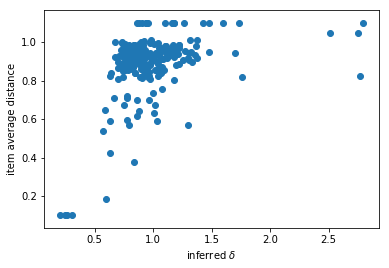

In [107]:
sddf = pd.DataFrame(stan_data)
diff_b = sddf.groupby("items").mean()["distances"].to_dict()
diff_m = dict([(i+1, v) for i, v in enumerate(opt["disc"]) if i+1 in diff_b.keys()])
plt.scatter(diff_m.values(), diff_b.values())
plt.xlabel("inferred $\delta$")
plt.ylabel("item average distance")
# plt.title("Item Diagnostic")
plt.show()

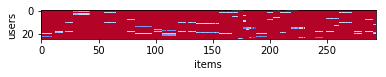

In [108]:
per_item_user_rankings = experiments.get_model_user_rankings(opt, debug=True)

In [109]:
# per_item_user_rankings = experiments.get_model_user_rankings({"dist_from_truth":samples["dist_from_truth"].mean(axis=0)}, debug=True)

In [110]:
random = experiments.get_baseline_random(crowd_df, "label", "itemID")
faveu = experiments.get_baseline_global_best_user(stan_data, crowd_df, "label", "itemID", "worker")
center = experiments.get_baseline_item_centrallest(stan_data, crowd_df, "label", "itemID", "worker")
model4 = experiments.get_preds(crowd_df, per_item_user_rankings, "label", "itemID", "worker")

In [111]:
oracle = experiments.get_oracle_preds(stan_data, crowd_df, "label", "itemID", "worker", bleu_multi, golddict)


In [112]:

_ = experiments.eval_preds_vs(random, faveu, golddict, bleu_multi)
_ = experiments.eval_preds_vs(random, center, golddict, bleu_multi)
_ = experiments.eval_preds_vs(random, model4, golddict, bleu_multi)
_ = experiments.eval_preds_vs(random, oracle, golddict, bleu_multi)

0.2566217578306344 0.2561061729416958
t-test Ttest_relResult(statistic=0.08329212451153509, pvalue=0.9336763324939175)
z-score -0.004874302902616506
baseline below thresh 0.0
model below thresh 0.0
0.2566217578306344 0.25357351733726
t-test Ttest_relResult(statistic=0.6092005889370582, pvalue=0.5428651744191519)
z-score -0.03565076790087583
baseline below thresh 0.0
model below thresh 0.0
0.2566217578306344 0.24848892054515187
t-test Ttest_relResult(statistic=1.3942227826590745, pvalue=0.16431028101144005)
z-score -0.08159071696469976
baseline below thresh 0.0
model below thresh 0.0
0.2566217578306344 0.30153356960252514
t-test Ttest_relResult(statistic=-9.351836661575094, pvalue=2.3493479375614263e-18)
z-score 0.5472748456307903
baseline below thresh 0.0
model below thresh 0.0


In [324]:
urdu_experiment_BK = urdu_experiment

In [337]:
urdu_experiment_BK.supervised_items

array([201, 215, 269, 246, 115,  43,   0,  79, 100, 220,  69, 191, 219,
       210, 180, 183, 279, 153,  45,  60])

In [413]:
urdu_experiment.golddict

{0: array(['Co-Education Banned: Taliban', 'Ban on Co-Education :Taliban',
        'Ban on co-education: Taliban', 'Co-Education Banned: Taliban',
        'Co-education banned: Taliban', 'Ban on co-education: Taliban',
        'Ban on Co-Education :Taliban', 'Co-education banned: Taliban',
        'Ban on co-education: Taliban', 'Co-Education Banned: Taliban',
        'Ban on Co-Education :Taliban', 'Co-education banned: Taliban'],
       dtype=object),
 1: array(['The injured victim was admitted to the Bannu Civil Hospital.',
        'The injured have been admitted to Bannu Civil Hospital.',
        'The injured individual has been transported to Bannu Civil Hospital.',
        'The injured victim was admitted to the Bannu Civil Hospital.',
        'The injured person has been admitted to the Bannu Civil Hospital.',
        'The injured individual has been transported to Bannu Civil Hospital.',
        'The injured have been admitted to Bannu Civil Hospital.',
        'The injured per

In [425]:
urdu_experiment.stan_data["NITEMS"]

293

In [142]:
i = 0
print(crowd_df.set_index("itemID").loc[i]["label"].values)
print()
print(urdu_experiment.annodf.set_index("itemID").loc[i]["label"].values)
print()
print(urdu_experiment.golddict.get(i))

['The ban on education coalition: Taliban' 'Ban on coeducation: Taliban']

['The ban on education coalition: Taliban' 'Ban on coeducation: Taliban']

['Co-Education Banned: Taliban' 'Ban on Co-Education :Taliban'
 'Ban on co-education: Taliban' 'Co-Education Banned: Taliban'
 'Co-education banned: Taliban' 'Ban on co-education: Taliban'
 'Ban on Co-Education :Taliban' 'Co-education banned: Taliban'
 'Ban on co-education: Taliban' 'Co-Education Banned: Taliban'
 'Ban on Co-Education :Taliban' 'Co-education banned: Taliban']


# The experiments

In [49]:
dist_fn = lambda x,y: 1 - gleu2way(x,y) 
urdu_experiment = experiments.RealExperiment(gleu_multi, "label", "itemID", "worker", distance_fn=dist_fn)
urdu_experiment.annodf = crowd_df.copy()
urdu_experiment.golddict = golddict
urdu_experiment.produce_stan_data()

100%|██████████| 293/293 [00:00<00:00, 512.24it/s]


In [50]:
urdu_experiment.describe()

25 & 293 & 561 & 22.44$\pm$40.94 & 1.91$\pm$0.94 & 9


In [51]:
nsemisupervised = 30#int(len(urdu_experiment.golddict) / 10)
experiments.set_supervised_items(urdu_experiment, nsemisupervised, apply_fn=lambda x:x[0])

Pickled model loaded
sigma 0.0016241202213981233


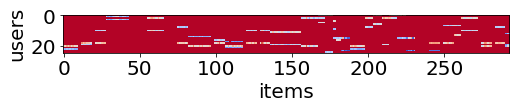

BEST AVAILABLE USER
0.18084647095941656 0.2113100930095663
t-test Ttest_relResult(statistic=-8.522055543073266, pvalue=4.2384063684032006e-17)
z-score 0.23509677834812953
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.18084647095941656 0.19855694006299177
t-test Ttest_relResult(statistic=-4.998897193081238, pvalue=6.544082278545953e-07)
z-score 0.13790389178372936
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.18084647095941656 0.19929835465559703
t-test Ttest_relResult(statistic=-4.8091993014692465, pvalue=1.6901748348474587e-06)
z-score 0.1326707220452781
baseline below thresh 0.0
model below thresh 0.0
ORACLE
0.18084647095941656 0.2462222168375013
t-test Ttest_relResult(statistic=-18.372597844572507, pvalue=2.8050754862561896e-67)
z-score 0.5068423388363793
baseline below thresh 0.0
model below thresh 0.0


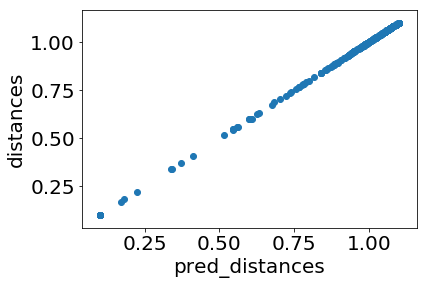

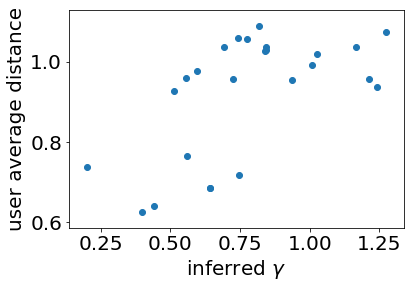

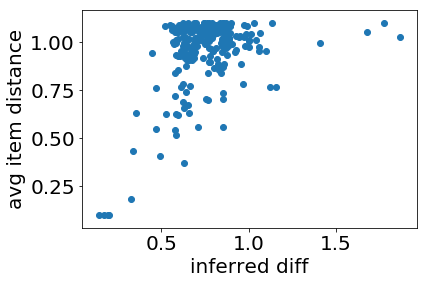

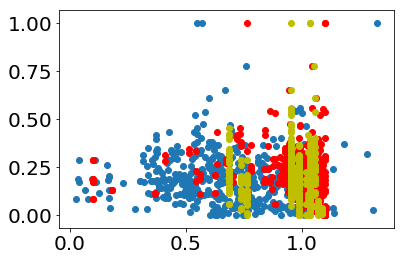


 ALL
ru 0 0.1420936543130114
bau -0.12411869666143584 0.17079238815414102
sad -0.17514636884822454 0.21118175073063544
mas -0.11633576586296389 0.2665411559998678


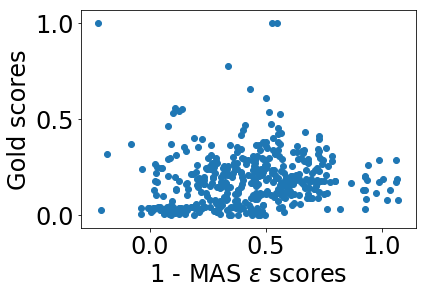

In [52]:
urdu_experiment.train(iter=1500, init_diff=False)
urdu_experiment.test(debug=True)
urdu_experiment.debug(plot_vs_gold=True, skip_miniplots=True)

100%|██████████| 293/293 [00:00<00:00, 334.24it/s]


Pickled model loaded
sigma 0.0024908710135709998


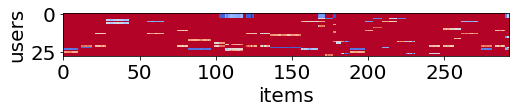

BEST AVAILABLE USER
0.1825861306276128 0.21617712211600026
t-test Ttest_relResult(statistic=-9.669659296809233, pvalue=2.055598819137072e-21)
z-score 0.2667555658272651
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.1825861306276128 0.19855694006299177
t-test Ttest_relResult(statistic=-4.431791473353596, pvalue=1.0123228333916663e-05)
z-score 0.12225922401350668
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.1825861306276128 0.20895585566024277
t-test Ttest_relResult(statistic=-7.551265543099604, pvalue=8.031814310975482e-14)
z-score 0.20831572766231304
baseline below thresh 0.0
model below thresh 0.0
ORACLE
0.1825861306276128 0.2462222168375013
t-test Ttest_relResult(statistic=-18.18992407493967, pvalue=4.051559956696123e-66)
z-score 0.501802942588335
baseline below thresh 0.0
model below thresh 0.0


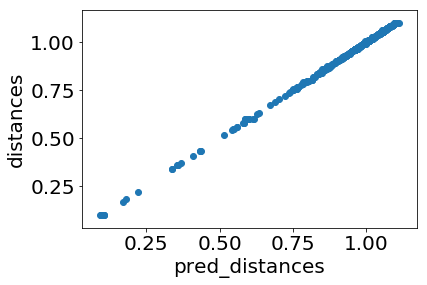

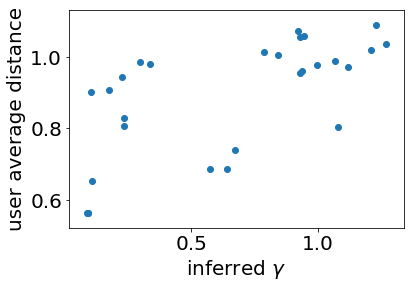

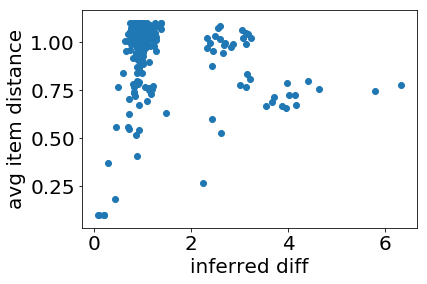

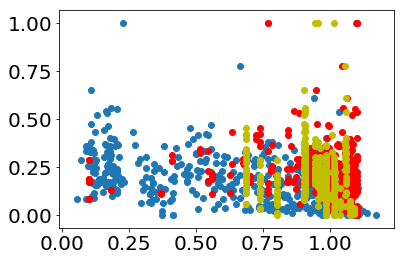


 ALL
ru 0 0.1420936543130114
bau -0.21890382779306677 0.1596437813413224
sad -0.1751463688482246 0.21118175073063544
mas -0.36300277317082597 0.3022801242552146


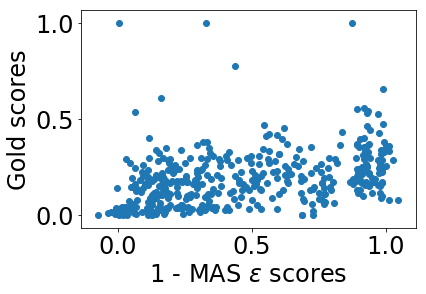

In [39]:
experiments.make_supervised_standata(urdu_experiment)
urdu_experiment.train(iter=1500, init_diff=False, norm_ratio=1)
urdu_experiment.test(debug=True)
urdu_experiment.debug(plot_vs_gold=True, skip_miniplots=True)

In [141]:
urdu_experiment.annodf.sort_values(urdu_experiment.item_colname)

item  itemID  \
130                      مخلوط تعلیم پر پابندی: طالبان       0   
140                      مخلوط تعلیم پر پابندی: طالبان       0   
149      زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔       1   
139      زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔       1   
131  شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...       2   
141  شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...       2   
132  پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...       3   
142  پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...       3   
133  پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...       4   
143  پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...       4   
134  مقامی طالبان کی جانب سے خواتین کے شناختی کارڈ ...       5   
144  مقامی طالبان کی جانب سے خواتین کے شناختی کارڈ ...       5   
135  مقامی لوگوں کے مطابق طالبان کی جانب سے جاری ہو...       6   
145  مقامی لوگوں کے مطابق طالبان کی جانب سے جاری ہو...       6   
146  تاہم خط میں اس بات کا ذکر نہیں کیاگیا ہے کہ لڑ...       7   
136  تاہم خط میں اس بات کا ذکر نہیں کیاگیا ہے کہ لڑ...       7   
147  پمفلٹ کے مطابق اس اعلان کے بعد تعلیم حاصل کرنے...       8   
137  پمفلٹ کے مطابق اس اعلان کے بعد تعلیم حاصل کرنے...       8   
138  اس کے علاوہ ضلع بنوں میں پولیس کا کہنا ہے کہ ا...       9   
148  اس کے علاوہ ضلع بنوں میں پولیس کا کہنا ہے کہ ا...       9   
108                  140 سالہ، نو کلو وزنی لابسٹر آزاد      10   
109  ’جارج دی جائنٹ لابسٹر‘ کو دو ہفتے قبل ایک سمند...      11   
101  شہر کی سمندری خوراک کی کمپنی نے اسے سو ڈالر می...      12   
110  شہر کی سمندری خوراک کی کمپنی نے اسے سو ڈالر می...      12   
102  اور فوراً ہی لابسٹر کی تصاویر کو اپنی تشہیر کی...      13   
111  اور فوراً ہی لابسٹر کی تصاویر کو اپنی تشہیر کی...      13   
103  تاہم جانوروں کے تحفظ کے لیے کام کرنے والے ایک ...      14   
112  تاہم جانوروں کے تحفظ کے لیے کام کرنے والے ایک ...      14   
104  جارج کو کینیڈا میں سمندر سے پکڑا گیا تھا جس کے...      15   
113  جارج کو کینیڈا میں سمندر سے پکڑا گیا تھا جس کے...      15   
..                                                 ...     ...   
69   آپ کے خیال میں عدنان سمیع پر ان کی اہلیہ کا ال...     278   
61   کہیں یہ الزام عدنان سمیع کو بدنام کرنے کی بھار...     279   
70   کہیں یہ الزام عدنان سمیع کو بدنام کرنے کی بھار...     279   
62                 اس بارے میں اپنی رائے سے آگاہ کریں۔     280   
71                 اس بارے میں اپنی رائے سے آگاہ کریں۔     280   
189  امریکی صدر جارج ڈبلیو بش نے اپنی الوداعی پریس ...     281   
190  میں نے بطور صدر حالات کے مطابق اور امریکی آئین...     282   
200  ، انہوں نے کہا امریکا کے دشمن آج بھی امریکا پر...     283   
191  ، انہوں نے کہا امریکا کے دشمن آج بھی امریکا پر...     283   
201  انہوں نے کہا کہ عراق سے وسیع پیمانے پر تباہی پ...     284   
192  انہوں نے کہا کہ عراق سے وسیع پیمانے پر تباہی پ...     284   
193  وائٹ ہاؤس میں اپنی آخری پریس کانفرنس سے خطاب ک...     285   
202  وائٹ ہاؤس میں اپنی آخری پریس کانفرنس سے خطاب ک...     285   
194  کیا آپ سمجھتے ہیں کہ اوباما وہ غلطیاں نہیں دہر...     286   
203  کیا آپ سمجھتے ہیں کہ اوباما وہ غلطیاں نہیں دہر...     286   
195  کیابش نے غلطیوں کا اعتراف کرنے میں تاخیر نہیں ...     287   
204  کیابش نے غلطیوں کا اعتراف کرنے میں تاخیر نہیں ...     287   
205          اوباما بش کی نصیحت پر عمل پیرا ہوسکیں گے؟     288   
196          اوباما بش کی نصیحت پر عمل پیرا ہوسکیں گے؟     288   
206                            اپنی رائے سے آگاہ کریں۔     289   
197                            اپنی رائے سے آگاہ کریں۔     289   
6                                    -زبیر خان، کراچی۔     290   
3                                    -زبیر خان، کراچی۔     290   
0                                    -زبیر خان، کراچی۔     290   
4    یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...     291   
7    یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...     291   
1    یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...     291   
8    جتنی بھی تنظیمیں جو فلسطین اور کشمیر میں موجود...     292   
2    جتنی بھی تنظیمیں جو فلسطین اور کشمیر میں موجود...     292   
5    جتنی بھی تنظیمیں جو

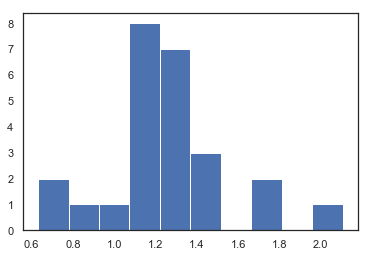

1.6842796754340872

In [164]:
plt.hist(urdu_experiment.opt["uerr"])
plt.show()
urdu_experiment.opt["uerr"][18]

In [221]:
len(urdu_experiment.annodf)

561

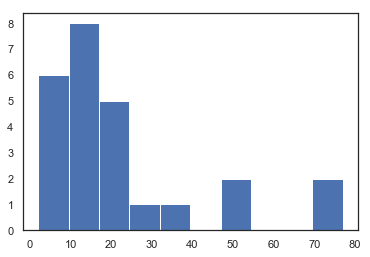

In [220]:
plt.hist(urdu_experiment.annodf.groupby("worker").count()["item"].values)
plt.show()

In [211]:
def calc_err(data):
    labels = data[urdu_experiment.label_colname].values
    itemIDs = data[urdu_experiment.item_colname].values
    golds = [urdu_experiment.golddict.get(i) for i in itemIDs]
    evals = [urdu_experiment.eval_fn(golds[i], labels[i]) for i, item in enumerate(itemIDs) if golds[i] is not None]
    return np.mean(evals)

worker_quality = urdu_experiment.annodf.groupby(urdu_experiment.uid_colname).apply(calc_err)


In [212]:
pd.DataFrame({"wq":worker_quality,
              "bau":experiments.uerr_baseline(urdu_experiment.stan_data).values,
              "mas":urdu_experiment.opt["uerr"]})

wq       bau       mas
worker                              
0       0.312027  1.035407  1.034986
1       0.241085  0.686637  0.703826
2       0.166918  0.990253  0.723303
3       0.230039  0.686637  0.707420
4       0.209449  1.027667  0.821216
5       0.188354  0.937751  0.672636
6       0.018475  1.088935  0.746397
7       0.313416  1.055992  0.806997
8       0.259313  1.059660  0.798246
9       0.118581  0.926018  0.738079
10      0.166461  1.036510  0.901126
11      0.239617  0.955080  0.759238
12      0.546563  0.717673  0.716080
13      0.125025  1.018018  0.753139
14      0.167120  0.976848  0.679278
15      0.123083  0.764531  0.550570
16      0.156685  1.027397  0.757132
17      0.236688  0.624930  0.425705
18      0.034092  1.073160  0.979768
19      0.288490  0.955966  0.863922
20      0.297802  0.955974  1.375540
21      0.225593  0.641786  0.431718
22      0.189988  0.960019  0.648137
23      0.146793  0.738469  0.579499
24      0.062045  1.036687  0.736759

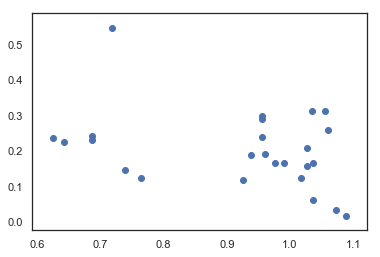

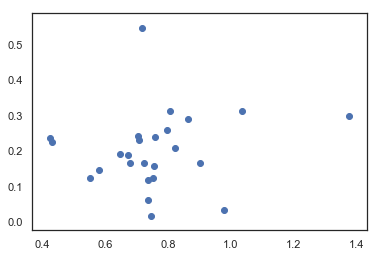

In [213]:
plt.scatter(experiments.uerr_baseline(urdu_experiment.stan_data), worker_quality)
plt.show()
# print(np.corrcoef(experiments.uerr_baseline(urdu_experiment.stan_data), worker_quality)[0,1])
plt.scatter(urdu_experiment.opt["uerr"], worker_quality)
plt.show()
# print(np.corrcoef(urdu_experiment.opt["uerr"], worker_quality)[0,1])

In [214]:
for i, row in urdu_experiment.annodf.sort_values(urdu_experiment.item_colname).iterrows():
    uid = row[urdu_experiment.uid_colname]
    if uid>0:
        continue
    annotation = row[urdu_experiment.label_colname]
    gold = urdu_experiment.golddict.get(row[urdu_experiment.item_colname])
    score = urdu_experiment.eval_fn(gold, annotation)
    print(uid)
    print(annotation)
    print(gold)
    print(score)
    print()
#     break

0
Hamas and Israel should reconcile so that this bloodshed comes to an end.
['Now Hamas and Israel should make peace so that this bloodshed comes to an end.'
 'Hamas and Israel should now reconcile so that bloodshed is stopped.'
 'Hamas and Israel should now enter into reconciliation in order to end the cycle of bloodshed.'
 'Now Hamas and Israel should make peace so that this bloodshed comes to an end.'
 'Hamas and Israel should strike peace now so that the bloodshed may stop.'
 'Hamas and Israel should now enter into reconciliation in order to end the cycle of bloodshed.'
 'Hamas and Israel should now reconcile so that bloodshed is stopped.'
 'Hamas and Israel should strike peace now so that the bloodshed may stop.'
 'Hamas and Israel should now enter into reconciliation in order to end the cycle of bloodshed.'
 'Now Hamas and Israel should make peace so that this bloodshed comes to an end.'
 'Hamas and Israel should now reconcile so that bloodshed is stopped.'
 'Hamas and Israel sho

In [43]:
# sddf = pd.DataFrame(urdu_experiment.stan_data)
# n1 = urdu_experiment.annodf.groupby(urdu_experiment.item_colname).count()[urdu_experiment.label_colname]
# fig, ax = plt.subplots()
# plt.hist(n1)
# # plt.title("Translation data")
# fs = 24
# fig.suptitle('Translation data', fontsize=fs)
# ax.set_xlabel("Number of annotations for item", fontsize=fs)
# ax.set_ylabel("Number of items", fontsize=fs)
# ax.xaxis.set_ticks([1,2,3])
# ax.tick_params(axis='both', which='major', labelsize=fs)
# plt.show()


In [42]:
# urdu_experiment.annodf.groupby(urdu_experiment.item_colname).count()[urdu_experiment.label_colname]

In [44]:
# urdu_experiment.debug()

In [471]:
urdu_experiment.set_supervised_labels(30, apply_fn=lambda x:x[0])

 10%|▉         | 29/293 [00:00<00:01, 146.64it/s]

    worker  itemID                                              label
0        0     292  Whatever organizations are present in Palestin...
1        0     169                                Absolutely correct.
2        0     107  After reaching Islamabad Joseph Biden met with...
3        0     178  Why such oppression of Muslims? If people like...
4        0     177  Where is the United Nations, which on the face...
5        0     106  American Vice President-elect Joseph Biden Rea...
6        0     110  Foreign Minister welcomed American Vice Presid...
7        0     111  America's Vice President-elect Joseph Biden ha...
8        0     291  It is a great tragedy that Israelis are massac...
9        0     112  Foreign Minister Shah Mehmood Qureshi and high...
10       0     171  For those who claim to love God, his Prophet, ...
11       0     170  Let us suppose that Hamas is 100 percent right...
12       0     168                  Muhammad Sarfaraz, Paris, France.
13       0     167  

100%|██████████| 293/293 [00:00<00:00, 444.16it/s]


In [473]:
urdu_experiment.train(iter=1500, norm_ratio=1)

Pickled model loaded
sigma 0.0005684649964993703


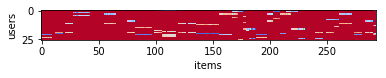

BEST AVAILABLE USER
0.18893076796795402 0.2151597301150529
t-test Ttest_relResult(statistic=-6.639750321061437, pvalue=4.585802057292184e-11)
z-score 0.18316988215199695
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.18893076796795402 0.19855694006299177
t-test Ttest_relResult(statistic=-2.500265665555595, pvalue=0.01253108996947508)
z-score 0.0689744862628043
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.18893076796795402 0.22762398023372324
t-test Ttest_relResult(statistic=-10.263330372975496, pvalue=7.951827820421999e-24)
z-score 0.2831330884448686
baseline below thresh 0.0
model below thresh 0.0
ORACLE
0.18893076796795402 0.2462222168375013
t-test Ttest_relResult(statistic=-19.261721630270586, pvalue=5.1128778050253864e-73)
z-score 0.5313704748610513
baseline below thresh 0.0
model below thresh 0.0


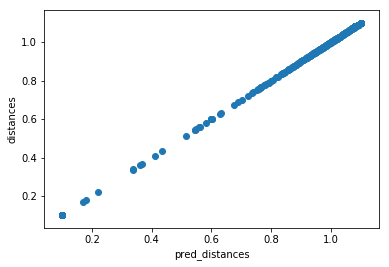

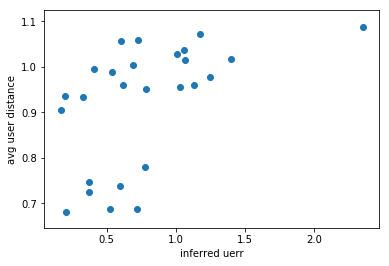

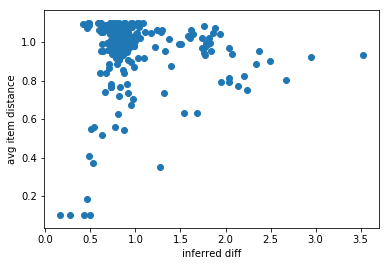

In [474]:
urdu_experiment.test(debug=True)

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: 

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: 

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: 

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: 

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: 

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: 

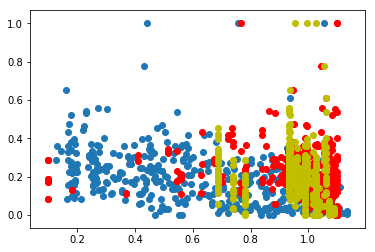


 ALL
bau -0.16405051480186375
sad -0.1751463688482246
map -0.4048989256910075


In [475]:
urdu_experiment.debug(plot_vs_gold=True, skip_miniplots=True)

item 1
   u1s  u2s  distances
0   23   21   0.988889


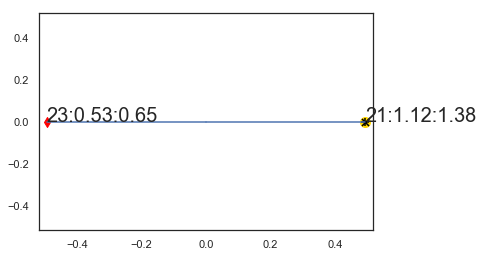

item 2
   u1s  u2s  distances
1   21   23   0.984615


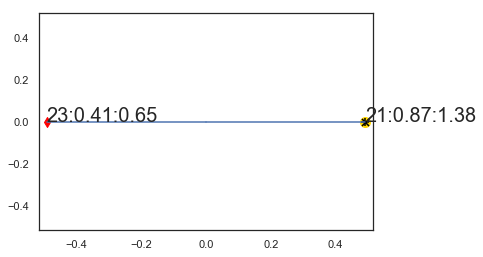

item 3
   u1s  u2s  distances
2   23   21        1.0


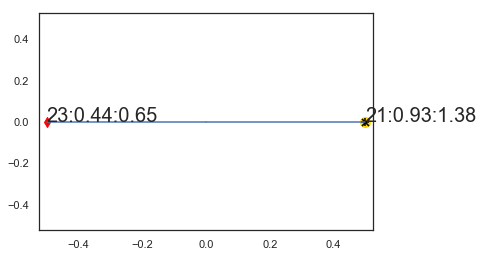

item 4
   u1s  u2s  distances
3   23   21   1.035897


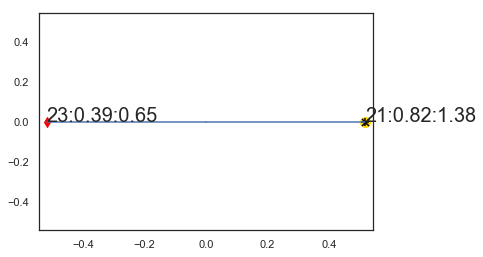

item 5
   u1s  u2s  distances
4   23   21    1.01791


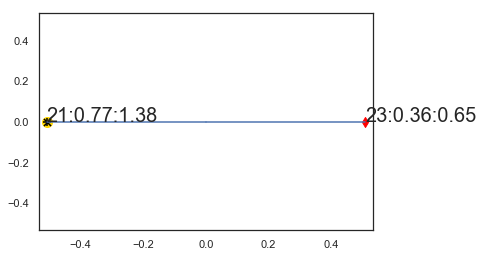

item 6
   u1s  u2s  distances
5   23   21   1.021687


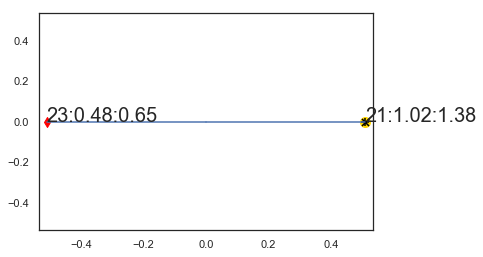

item 7
   u1s  u2s  distances
6   23   21   0.883784


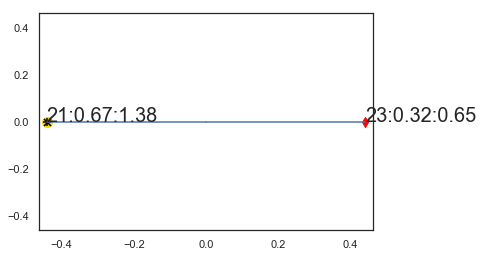

item 8
   u1s  u2s  distances
7   23   21   0.971795


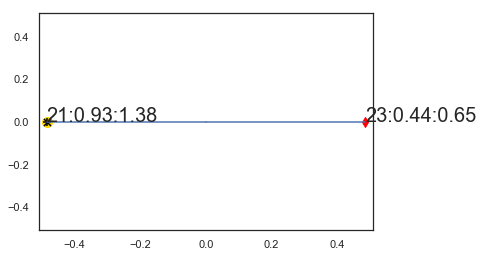

item 9
   u1s  u2s  distances
8   21   23   0.969231


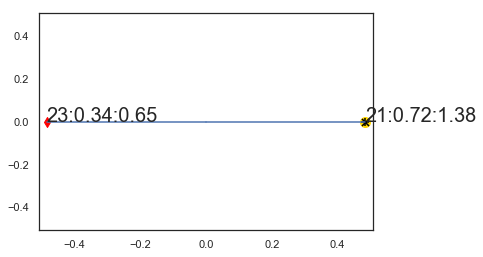

item 10
   u1s  u2s  distances
9   23   21   0.973134


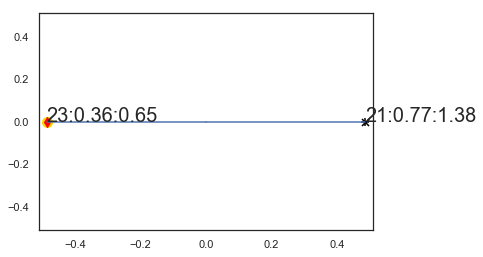

item 13
    u1s  u2s  distances
10   20   19   1.081818


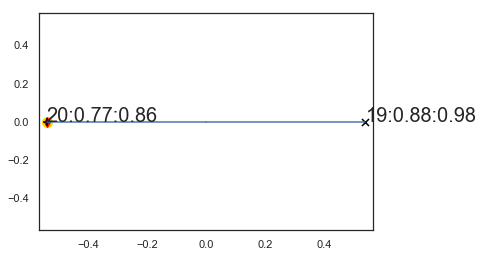

item 14
    u1s  u2s  distances
11   19   20   1.072727


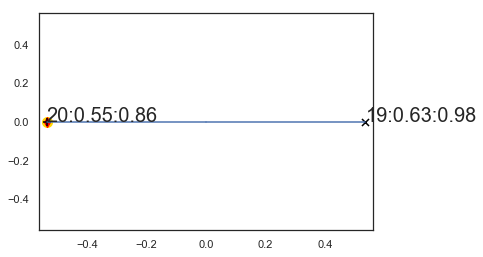

item 15
    u1s  u2s  distances
12   19   20   1.054545


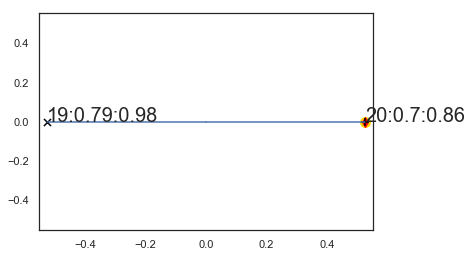

item 16
    u1s  u2s  distances
13   19   20   1.045455


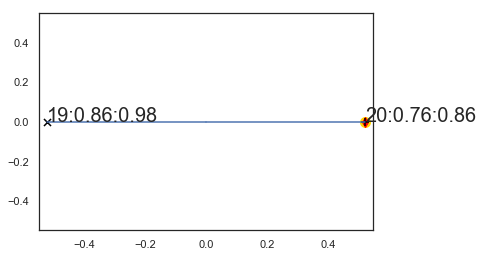

item 17
    u1s  u2s  distances
14   20   19   1.081818


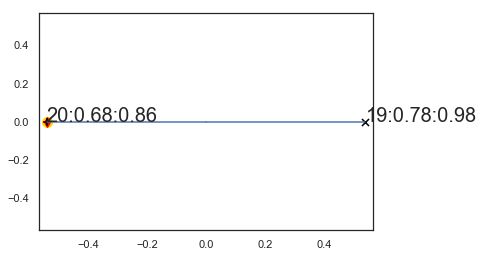

item 18
    u1s  u2s  distances
15   20   19   1.072727


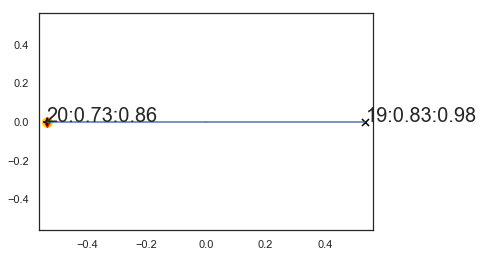

item 19
    u1s  u2s  distances
16   19   20   1.050704


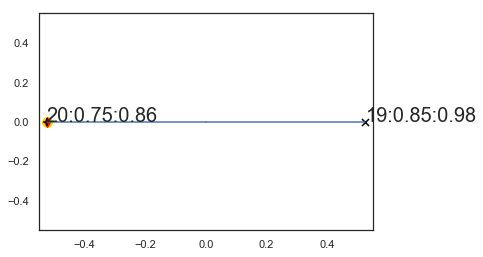

item 22
    u1s  u2s  distances
17   11   19   1.063636


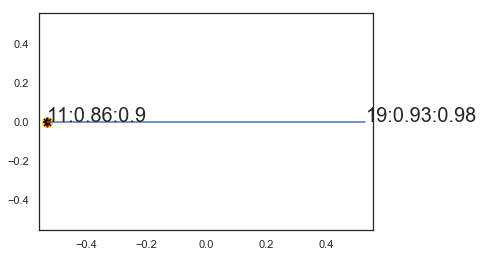

item 23
    u1s  u2s  distances
18   11   19   1.054545


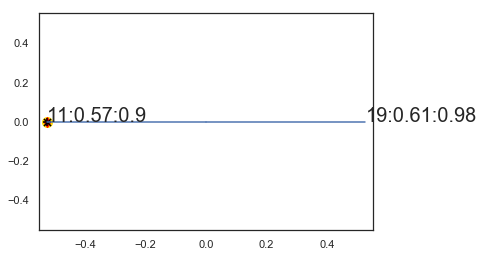

item 24
    u1s  u2s  distances
19   11   19   1.018182


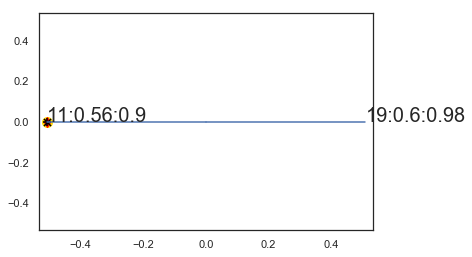

item 25
    u1s  u2s  distances
20   19   11   1.090909


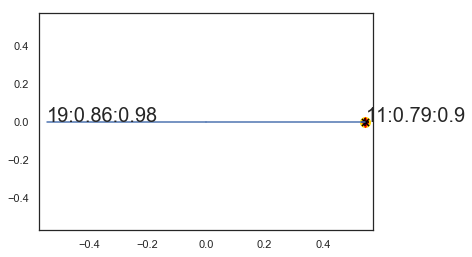

item 26
    u1s  u2s  distances
21   11   19   1.061905


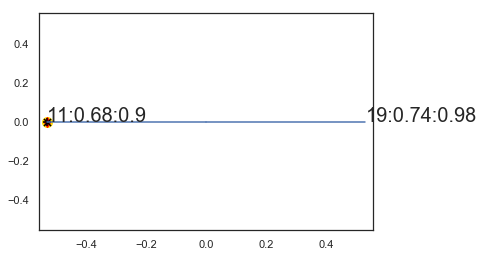

item 27
    u1s  u2s  distances
22   11   19   1.045455


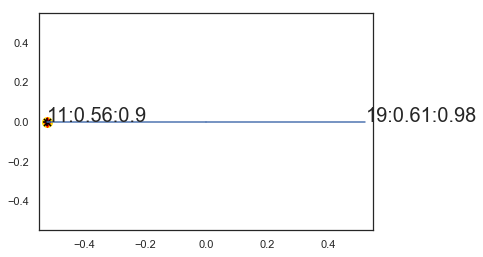

item 28
    u1s  u2s  distances
23   11   19   1.071014


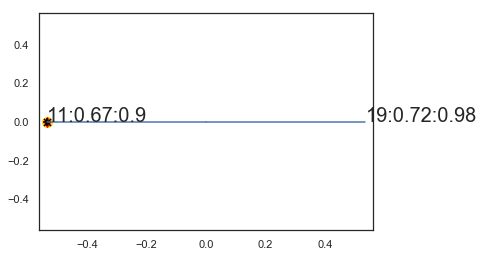

item 29
    u1s  u2s  distances
24    2    4   0.885714


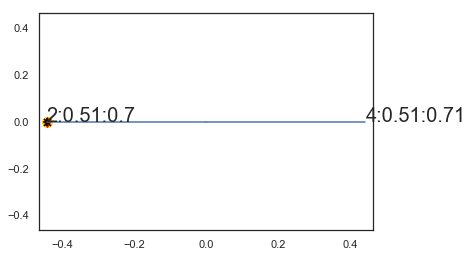

item 30
    u1s  u2s  distances
25    4    2   0.410345


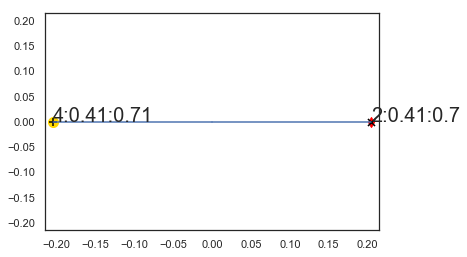

item 31
    u1s  u2s  distances
26    4    2   0.674713


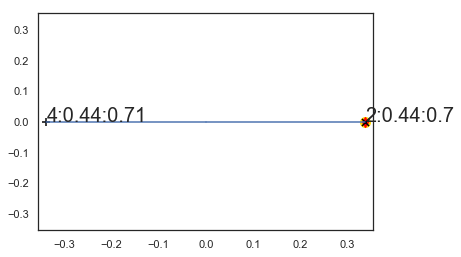

item 32
    u1s  u2s  distances
27    4    2   0.545946


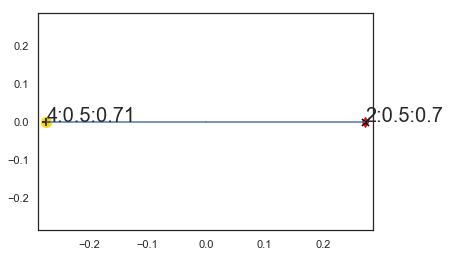

item 33
    u1s  u2s  distances
28    4    2   0.560784


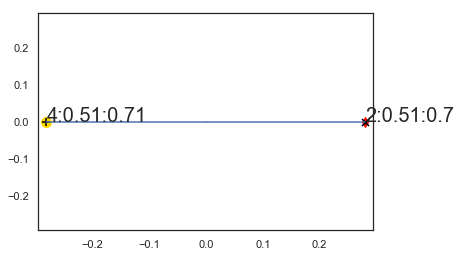

item 34
    u1s  u2s  distances
29    2    4   0.872727


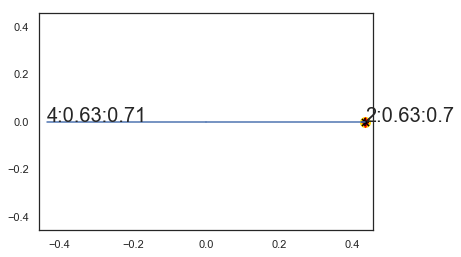

item 35
    u1s  u2s  distances
30    4    2    0.78018


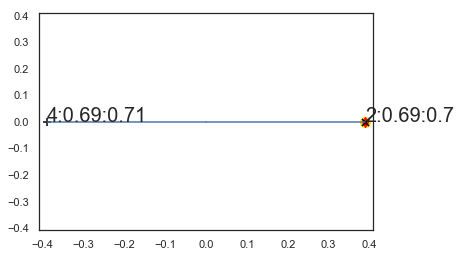

item 36
    u1s  u2s  distances
31    4    2   0.955556


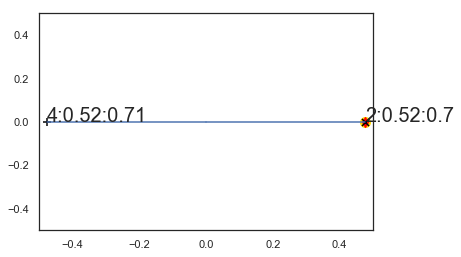

item 37
    u1s  u2s  distances
32    4    2   0.766667


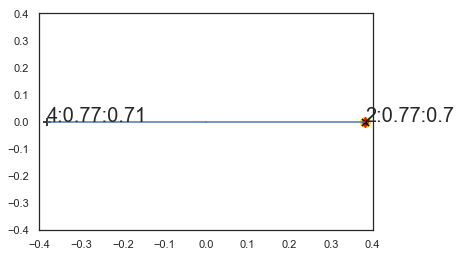

item 38
    u1s  u2s  distances
33    4    2   0.721951


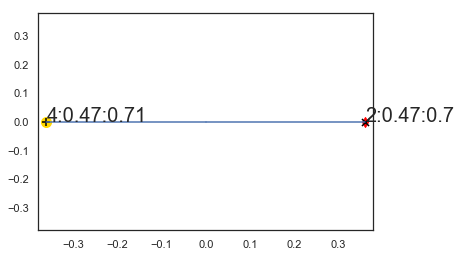

item 39
    u1s  u2s  distances
34    4    2   0.544444


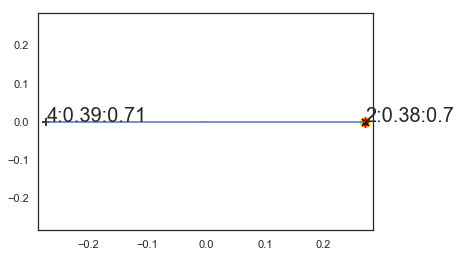

item 40
    u1s  u2s  distances
35    2    4   0.736364


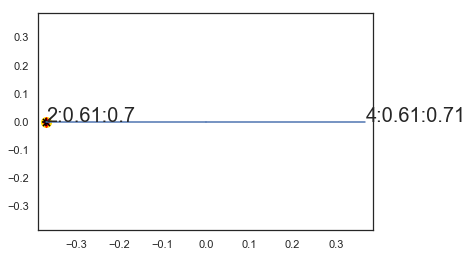

item 41
    u1s  u2s  distances
36    2    4   0.702041


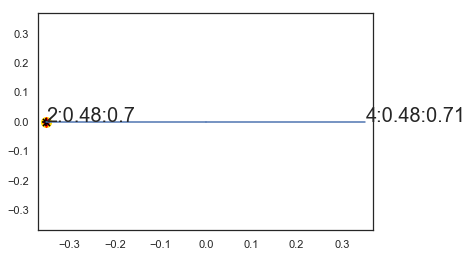

item 42
    u1s  u2s  distances
37    2    4   0.627027


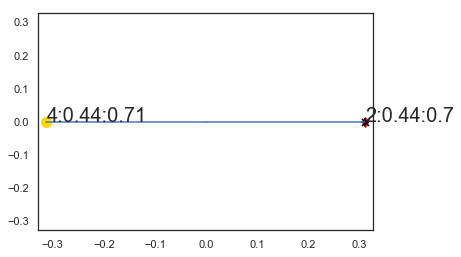

item 43
    u1s  u2s  distances
38    4    2   0.515094


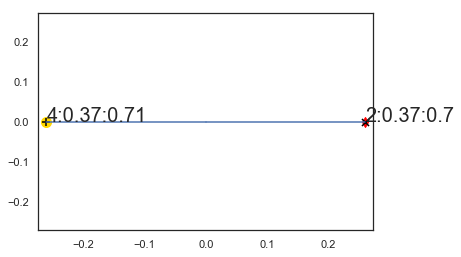

item 56
    u1s  u2s  distances
39    3   11        1.0


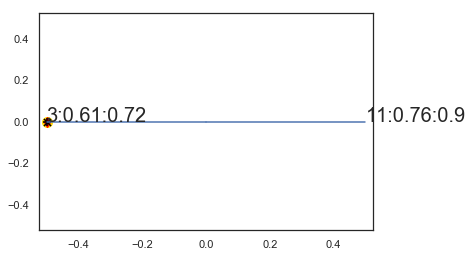

item 57
    u1s  u2s  distances
40   11    3   0.970968


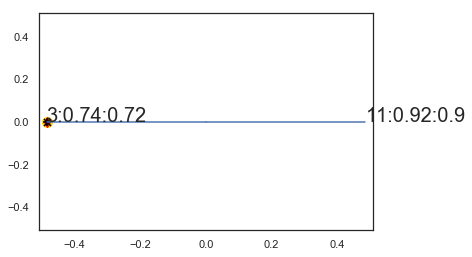

item 58
    u1s  u2s  distances
41   11    3    0.97931


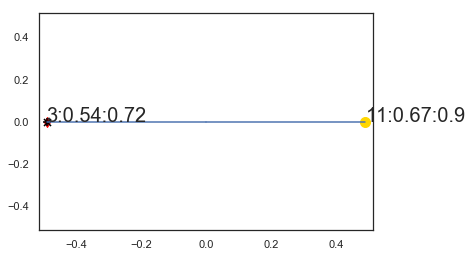

item 59
    u1s  u2s  distances
42    3   11   0.951852


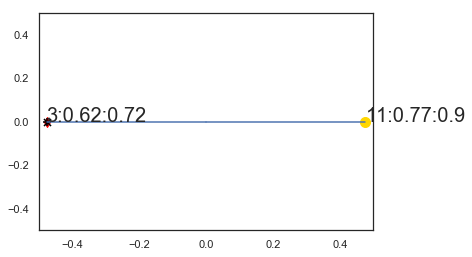

item 60
    u1s  u2s  distances
43    3   11   1.028571


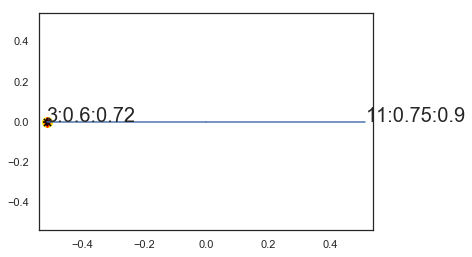

item 61
    u1s  u2s  distances
44    3   11   0.783673


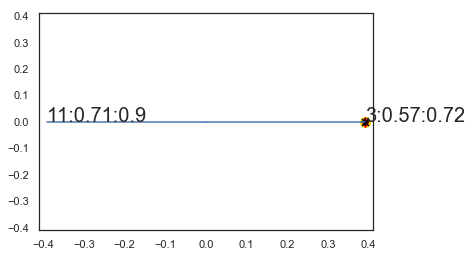

item 62
    u1s  u2s  distances
45   11    3    0.83913


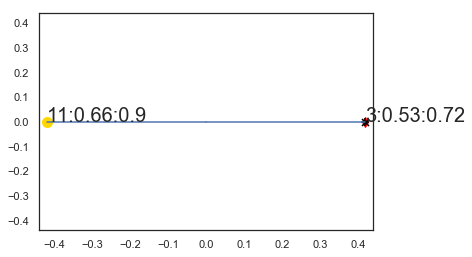

item 63
    u1s  u2s  distances
46    3   11   1.013043


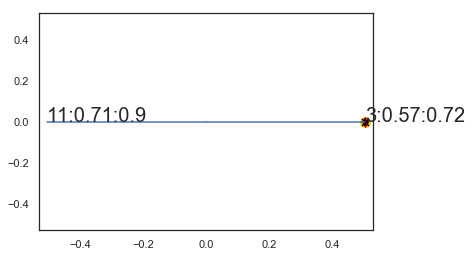

item 64
    u1s  u2s  distances
47    3   11   0.896296


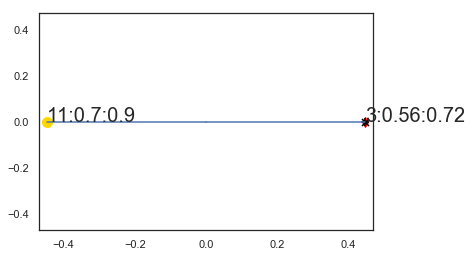

item 65
    u1s  u2s  distances
48    3   11   1.025532


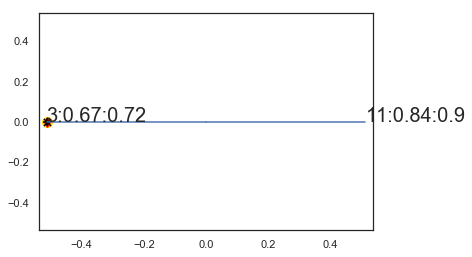

item 66
    u1s  u2s  distances
49    3   11   0.977358


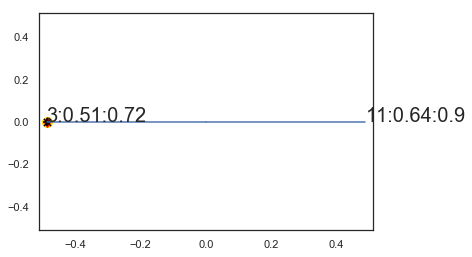

item 76
    u1s  u2s  distances
50    9   19   1.044444


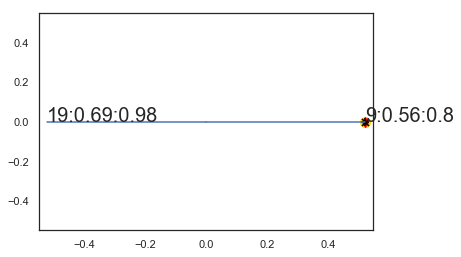

item 77
    u1s  u2s  distances
51    9   19   1.072727


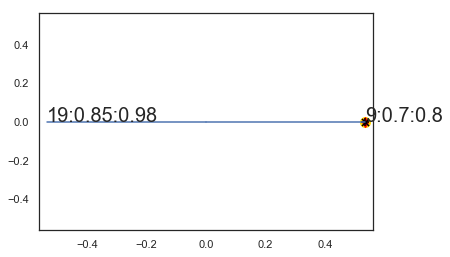

item 78
    u1s  u2s  distances
52    9   19   1.071429


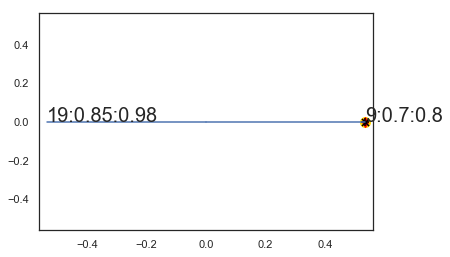

item 79
    u1s  u2s  distances
53    9   19   1.063636


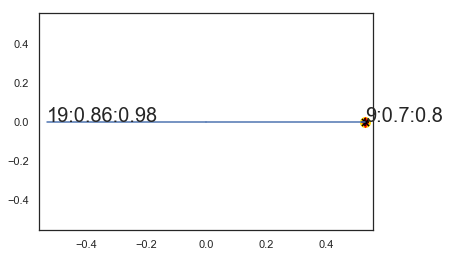

item 80
    u1s  u2s  distances
54    9   19   1.072727


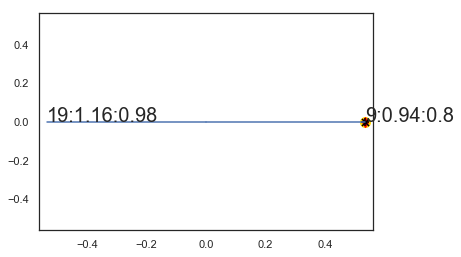

item 81
    u1s  u2s  distances
55   19    9   1.054545


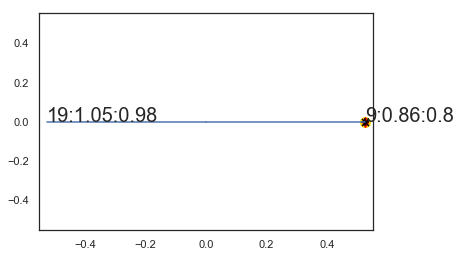

item 82
    u1s  u2s  distances
56    9   19   1.072727


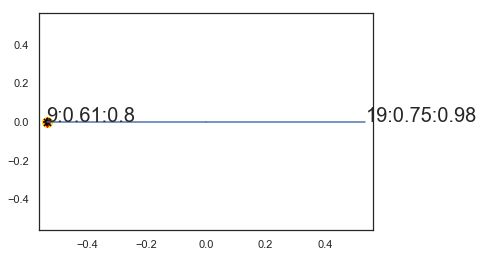

item 83
    u1s  u2s  distances
57   15   21   0.918182


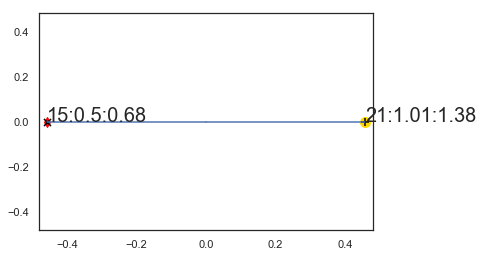

item 84
    u1s  u2s  distances
58   15   21    1.00367


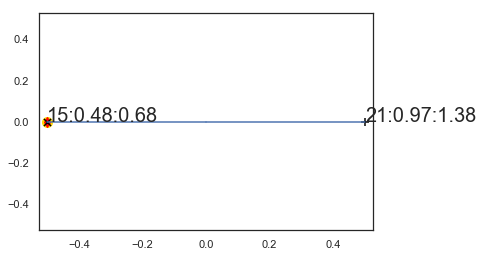

item 85
    u1s  u2s  distances
59   21   15   0.982353


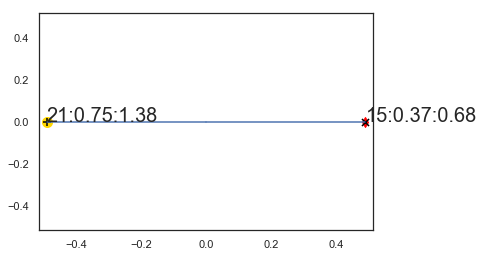

item 86
    u1s  u2s  distances
60   21   15   1.028571


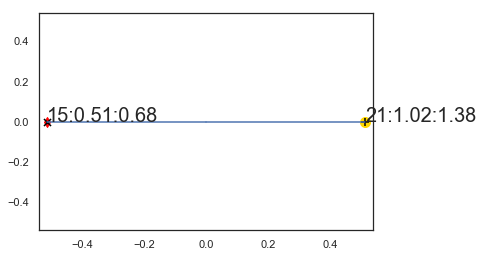

item 87
    u1s  u2s  distances
61   21   15   0.967347


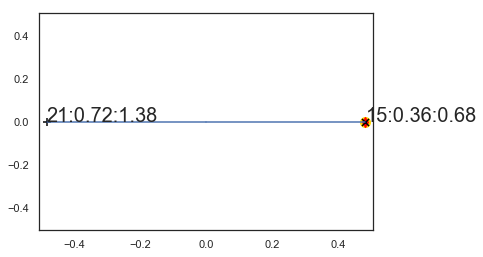

item 88
    u1s  u2s  distances
62   21   15   0.936842


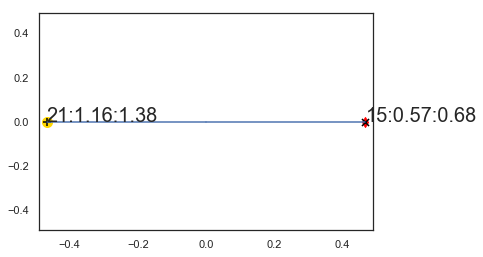

item 89
    u1s  u2s  distances
63   21   15   1.024242


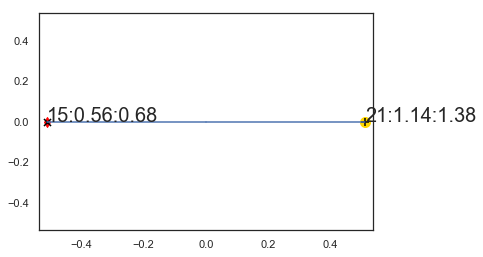

item 90
    u1s  u2s  distances
64   15   21   0.993939


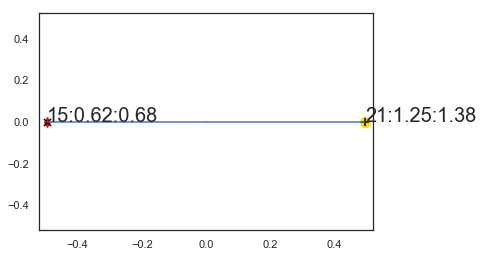

item 91
    u1s  u2s  distances
65   21   15   1.021053


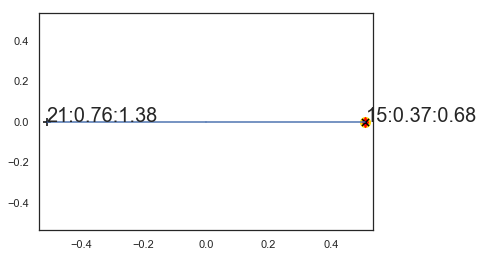

item 92
    u1s  u2s  distances
66   21   15   1.025373


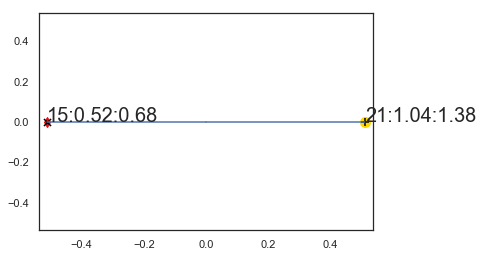

item 93
    u1s  u2s  distances
67   21   15   0.923529


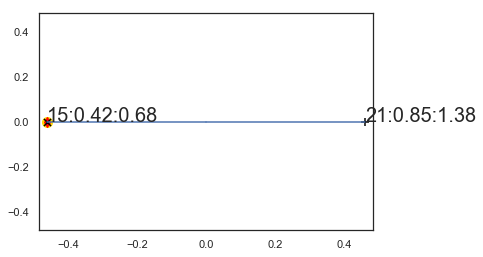

item 94
    u1s  u2s  distances
68   21   15   0.943137


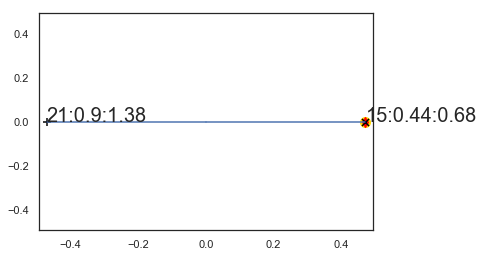

item 95
    u1s  u2s  distances
69   21   15   0.973684


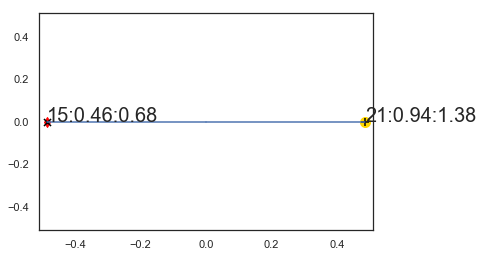

item 96
    u1s  u2s  distances
70   15   21   0.940426


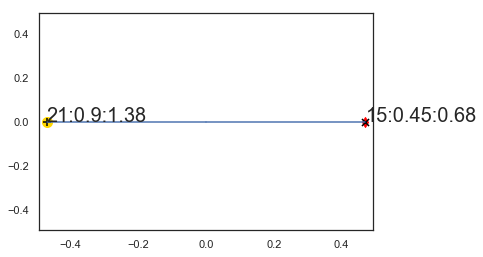

item 97
    u1s  u2s  distances
71   21   15    0.97037


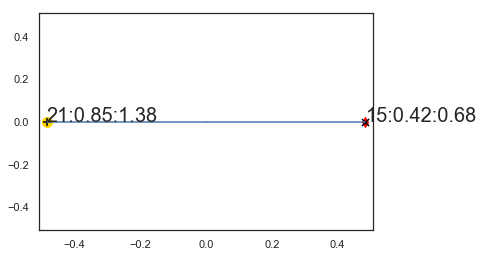

item 100
    u1s  u2s  distances
72   19   17   1.069231


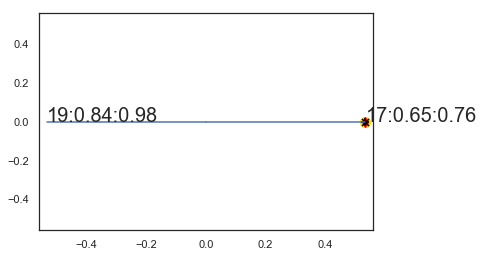

item 101
    u1s  u2s  distances
73   19   17   1.063636


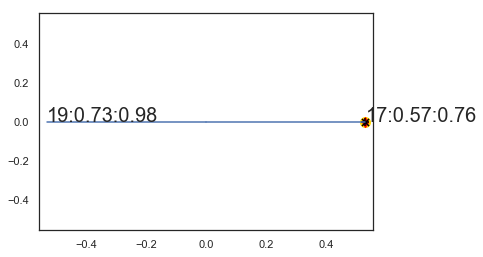

item 102
    u1s  u2s  distances
74   19   17   1.072727


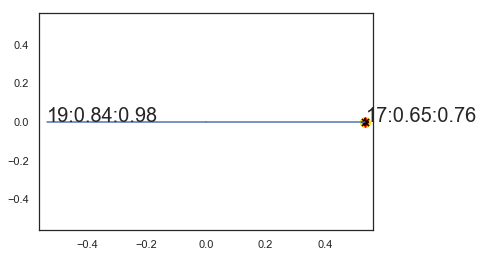

item 103
    u1s  u2s  distances
75   17   19   1.082759


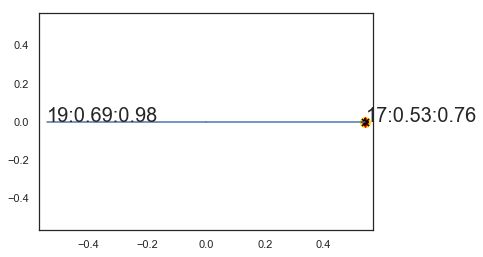

item 104
    u1s  u2s  distances
76   19   17   1.064789


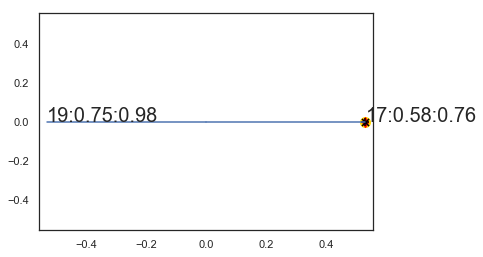

item 105
    u1s  u2s  distances
77   19   17   1.063636


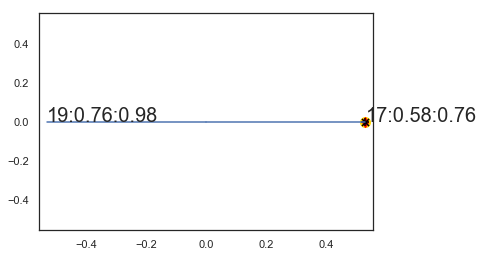

item 106
    u1s  u2s  distances
78   19   17   1.054545


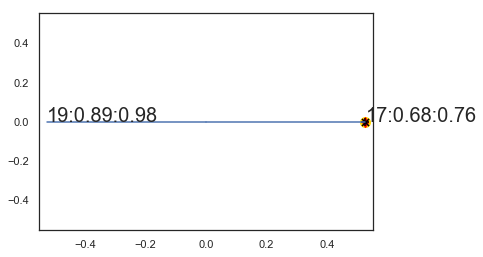

item 107
    u1s  u2s  distances
79   21   18   0.933333
80   21   22   0.933333
81   18   22   0.100000


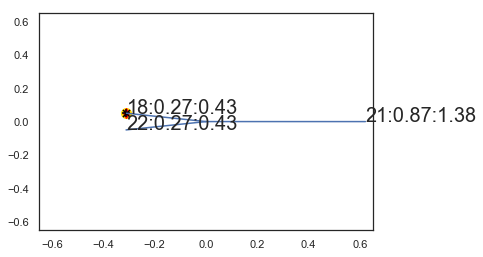

item 108
    u1s  u2s  distances
82   22   18   0.338095
83   22   21   0.790476
84   18   21   0.757895


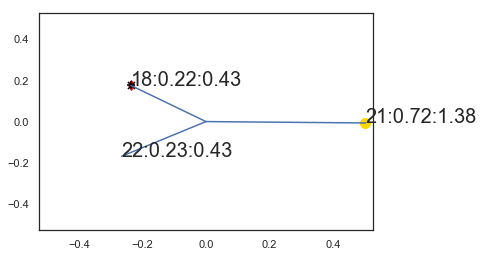

item 109
    u1s  u2s  distances
85   22   18   0.100000
86   22   21   1.008163
87   18   21   1.008163


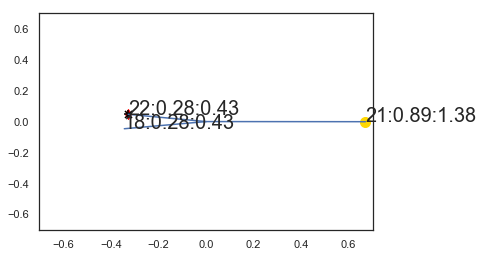

item 110
    u1s  u2s  distances
88   22   21   0.857426


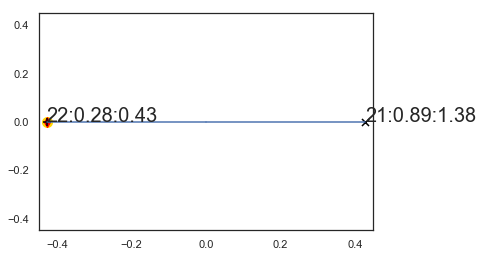

item 111
    u1s  u2s  distances
89   18   21   0.894118
90   18   22   0.100000
91   21   22   0.894118


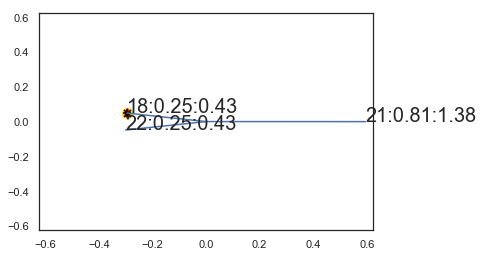

item 112
    u1s  u2s  distances
92   21   18   0.951351
93   21   22   1.023077
94   18   22   0.689744


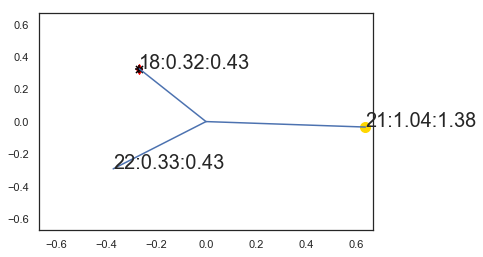

item 113
    u1s  u2s  distances
95   21   18   0.991304
96   21   22   0.991304
97   18   22   0.339130


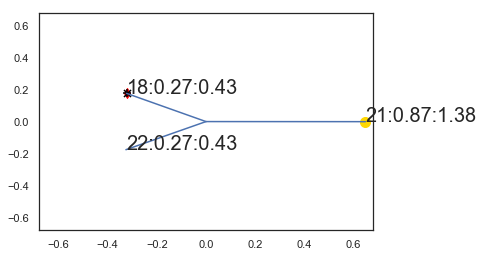

item 114
     u1s  u2s  distances
98    21   18   1.023077
99    21   22   1.061538
100   18   22   0.600000


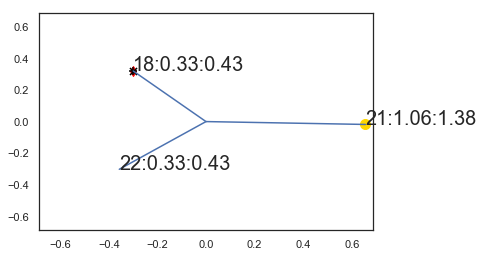

item 115
     u1s  u2s  distances
101   18   21   0.947826
102   18   22   0.170423
103   21   22   0.952113


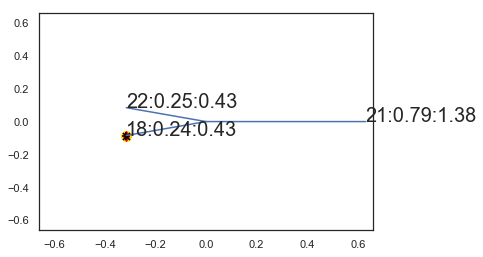

item 116
     u1s  u2s  distances
104   21   18   0.933333
105   21   22   0.941463
106   18   22   0.221951


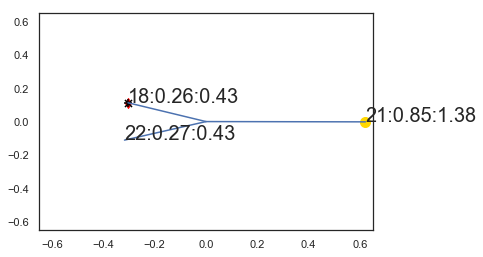

item 117
     u1s  u2s  distances
107   22   18   0.100000
108   22   21   0.882051
109   18   21   0.882051


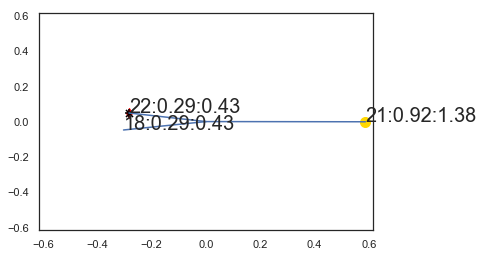

item 118
     u1s  u2s  distances
110   22   18   0.600000
111   22   21   1.066667
112   18   21   1.066667


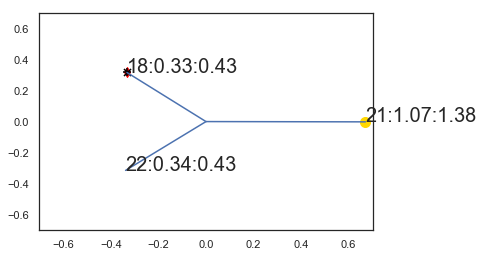

item 121
     u1s  u2s  distances
113   11   19   1.081818


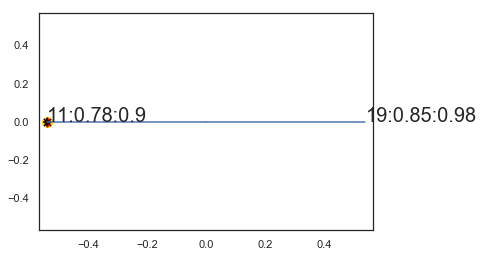

item 122
     u1s  u2s  distances
114   11   19   1.054545


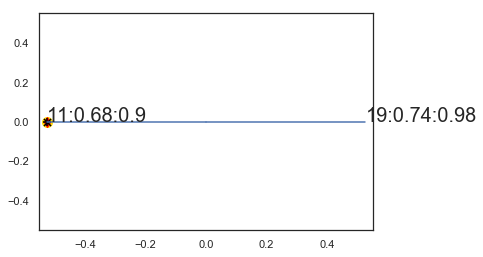

item 123
     u1s  u2s  distances
115   11   19   1.063636


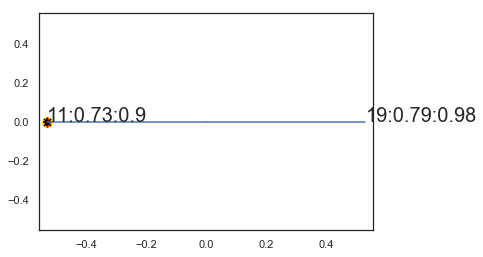

item 124
     u1s  u2s  distances
116   11   19   1.072727


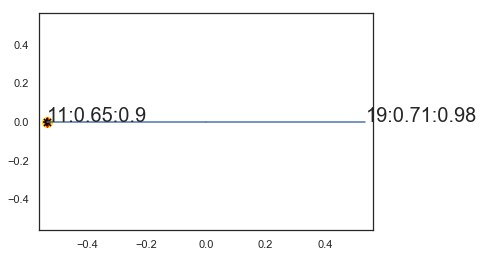

item 125
     u1s  u2s  distances
117   11   19   1.063636


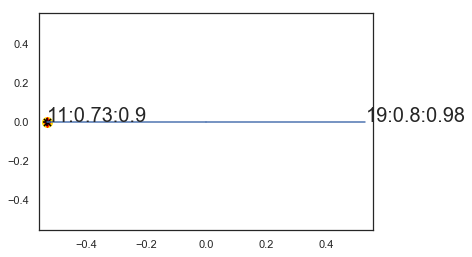

item 126
     u1s  u2s  distances
118   19   11   1.081818


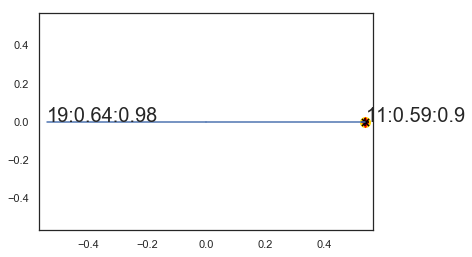

item 127
     u1s  u2s  distances
119   11   19   1.090909


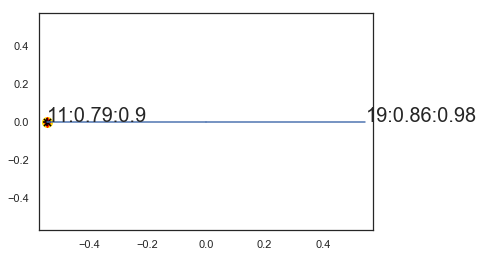

item 130
     u1s  u2s  distances
120   11   19   1.090909


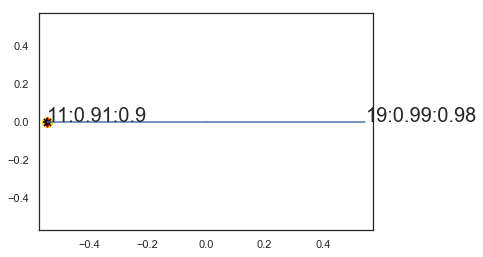

item 131
     u1s  u2s  distances
121   11   19        1.1


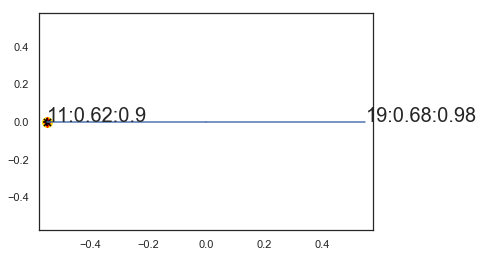

item 132
     u1s  u2s  distances
122   11   19   1.081818


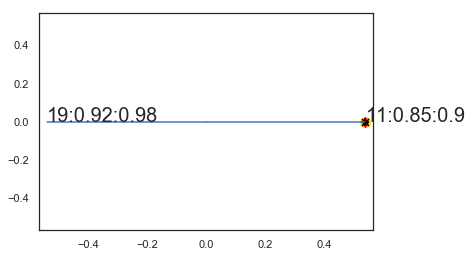

item 133
     u1s  u2s  distances
123   11   19   1.054545


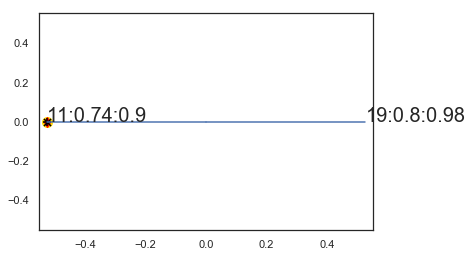

item 134
     u1s  u2s  distances
124   11   19   1.059016


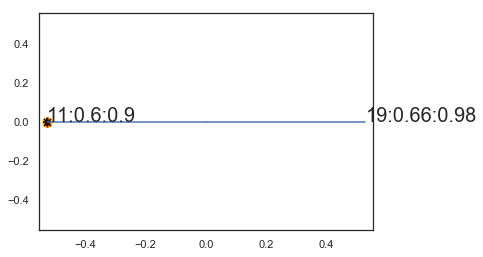

item 135
     u1s  u2s  distances
125   11   19   1.054545


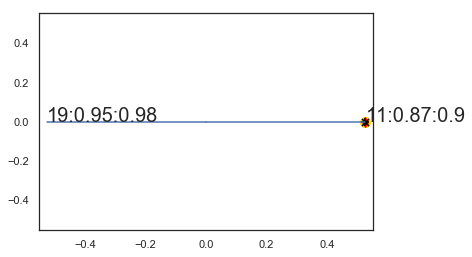

item 136
     u1s  u2s  distances
126   11   19   1.072727


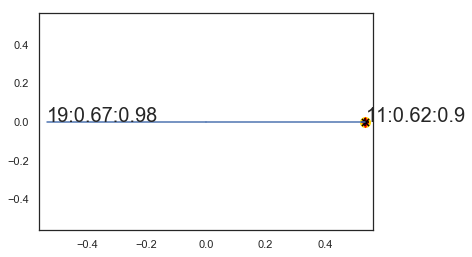

item 137
     u1s  u2s  distances
127   20   12   1.011765


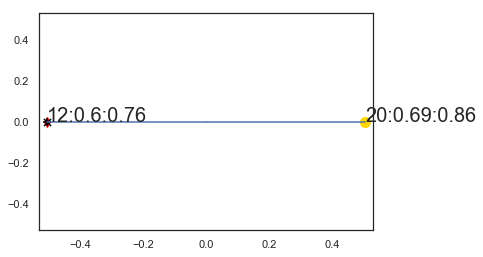

item 138
     u1s  u2s  distances
128   20   12   1.010256


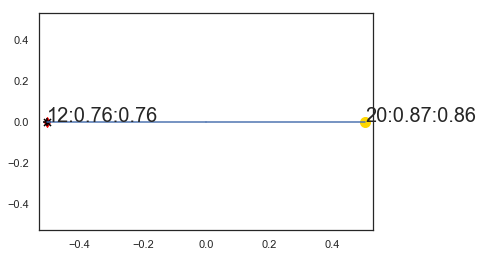

item 139
     u1s  u2s  distances
129   20   12   0.933333


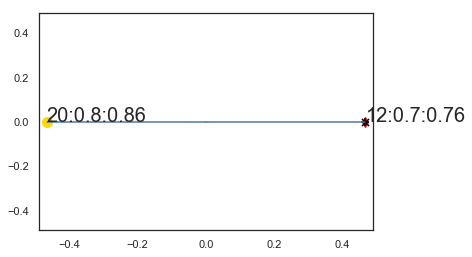

item 140
     u1s  u2s  distances
130   20   12   0.971429


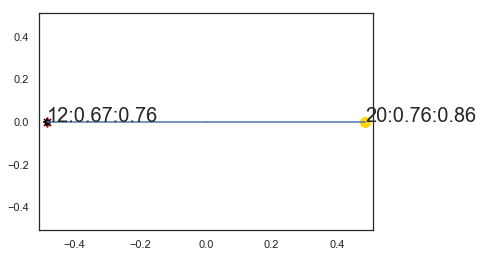

item 141
     u1s  u2s  distances
131   20   12   0.951351


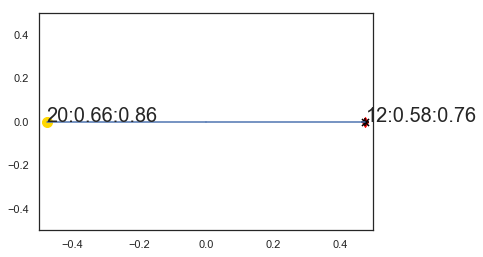

item 142
     u1s  u2s  distances
132   20   12   0.906452


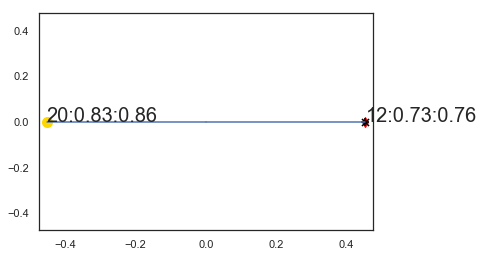

item 143
     u1s  u2s  distances
133   12   20   0.854902


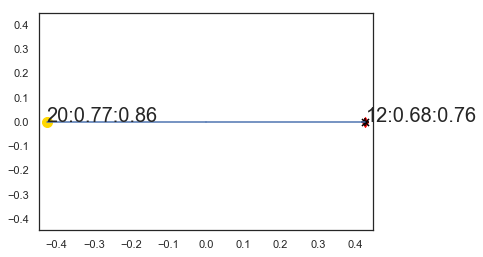

item 144
     u1s  u2s  distances
134   12   20   1.033333


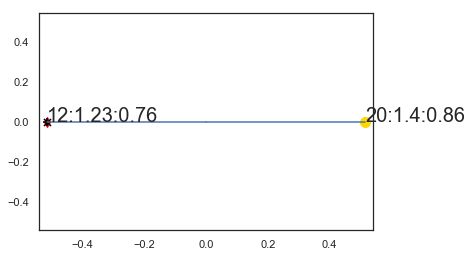

item 145
     u1s  u2s  distances
135   20   12   1.042623


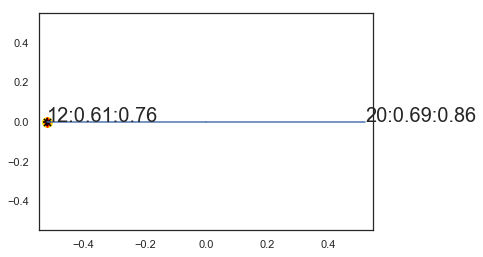

item 146
     u1s  u2s  distances
136   12   20        1.0


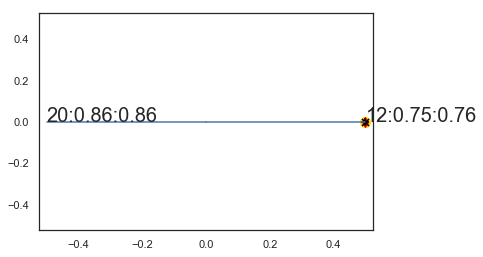

item 147
     u1s  u2s  distances
137   12   20   0.987755


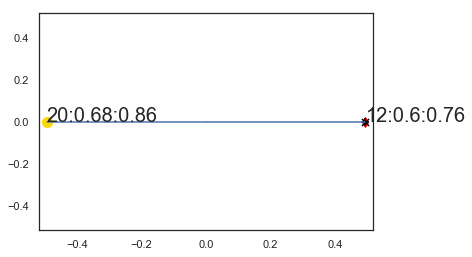

item 148
     u1s  u2s  distances
138   20   12   0.766667


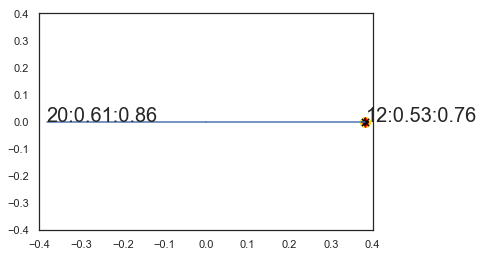

item 149
     u1s  u2s  distances
139   12   20       0.74


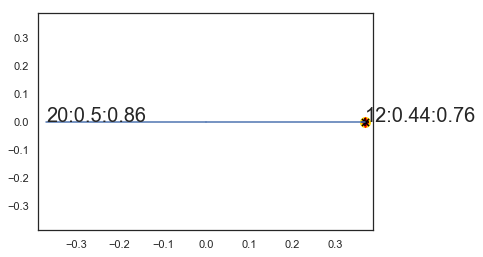

item 150
     u1s  u2s  distances
140   20   12   0.946154


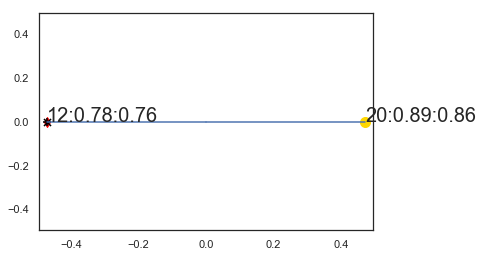

item 151
     u1s  u2s  distances
141   12   20   1.008163


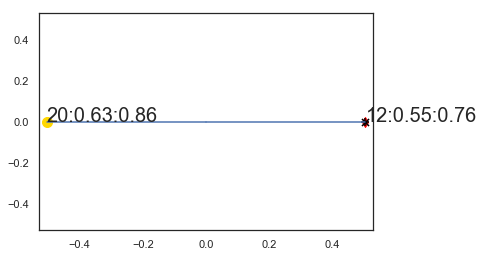

item 152
     u1s  u2s  distances
142   20   12   0.988889


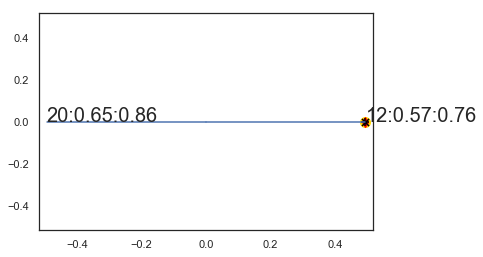

item 153
     u1s  u2s  distances
143   20   12   0.948485


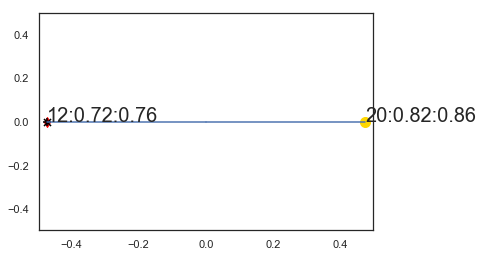

item 154
     u1s  u2s  distances
144   20   12   0.962069


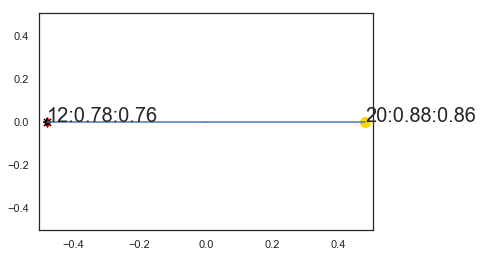

item 155
     u1s  u2s  distances
145   20   12   1.014894


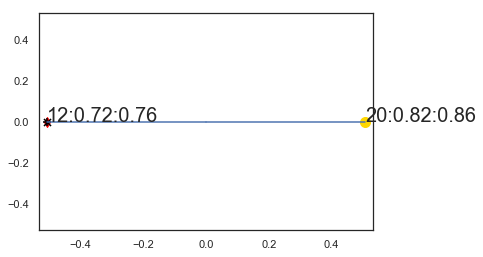

item 156
     u1s  u2s  distances
146   12   20   1.023077


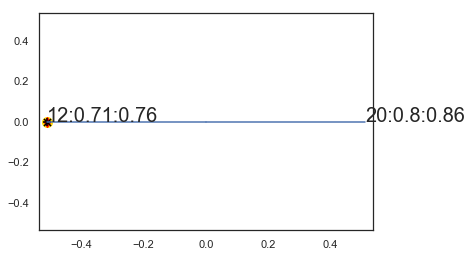

item 157
     u1s  u2s  distances
147   21    3   0.991304


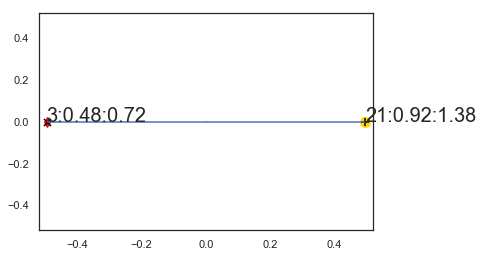

item 158
     u1s  u2s  distances
148   21    3   0.877778


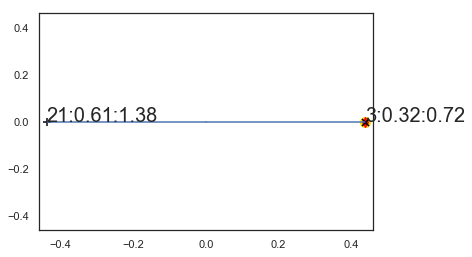

item 159
     u1s  u2s  distances
149   21    3   0.990909


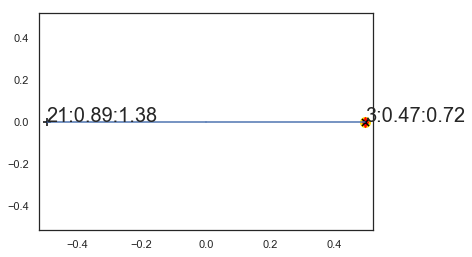

item 160
     u1s  u2s  distances
150    3   21   0.976923


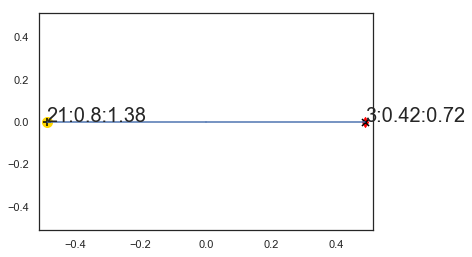

item 161
     u1s  u2s  distances
151    3   21   0.994366


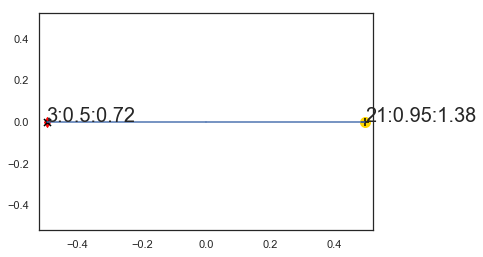

item 162
     u1s  u2s  distances
152    3   21   0.633333


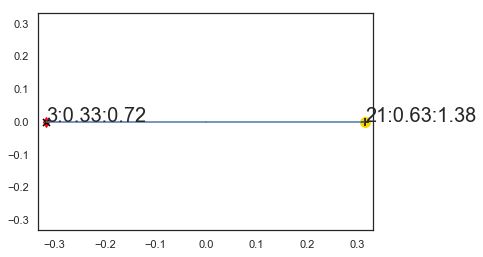

item 163
     u1s  u2s  distances
153    3   21   0.969863


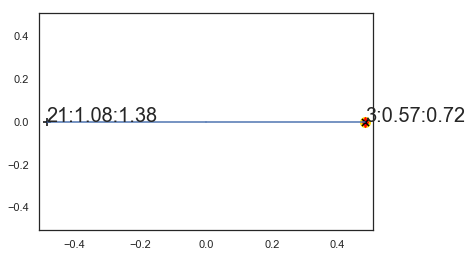

item 164
     u1s  u2s  distances
154    3   21   0.997959


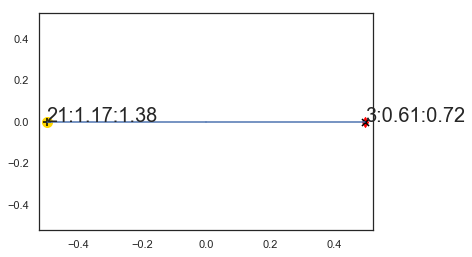

item 165
     u1s  u2s  distances
155    3   21   0.944828


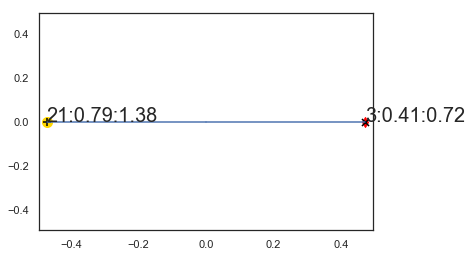

item 166
     u1s  u2s  distances
156   21    3   0.983117


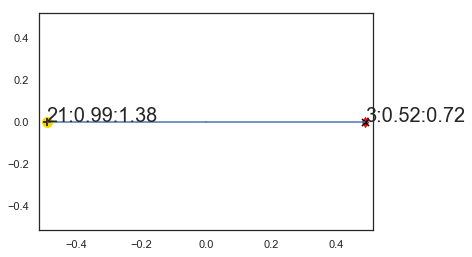

item 167
     u1s  u2s  distances
157   21    3   0.951351


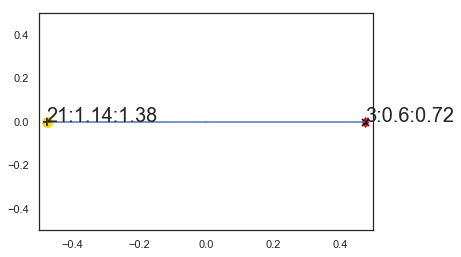

item 168
     u1s  u2s  distances
158    3    6   0.548276
159    3    1   0.875862
160    6    1   0.859259


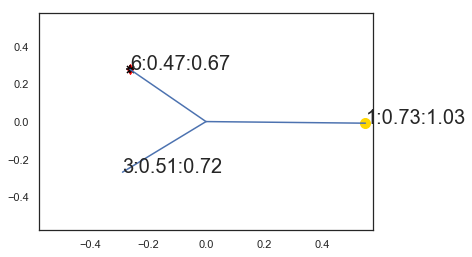

item 169
     u1s  u2s  distances
161    6    1        1.0
162    6    3        0.8
163    1    3        1.0


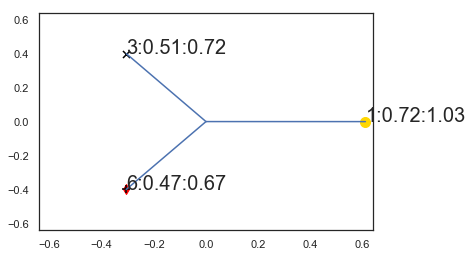

item 170
     u1s  u2s  distances
164    3    6        1.1
165    3    1        1.1
166    6    1        1.1


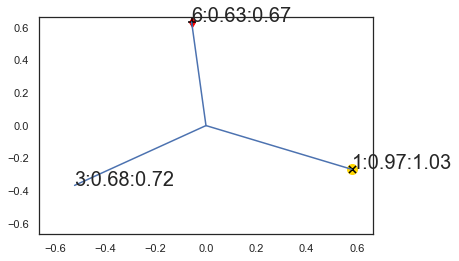

item 171
     u1s  u2s  distances
167    3    6   0.996396
168    3    1   1.025287
169    6    1   0.982883


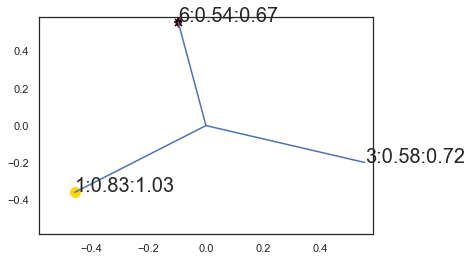

item 172
     u1s  u2s  distances
170    3    6   0.995349
171    3    1   1.039024
172    6    1   0.995349


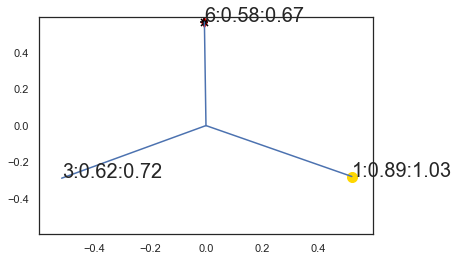

item 173
     u1s  u2s  distances
173    1   25   1.010256


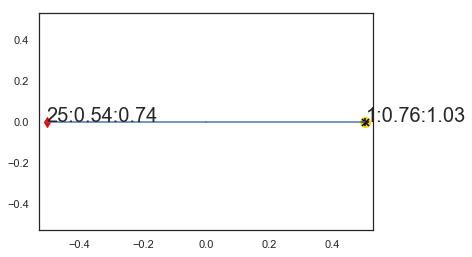

item 174
     u1s  u2s  distances
174    1   25        1.1


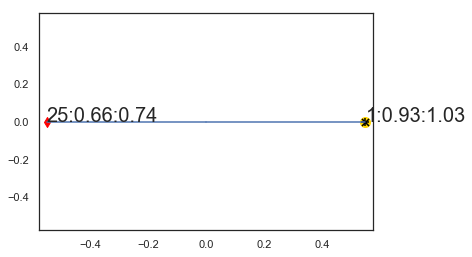

item 175
     u1s  u2s  distances
175    1   25   1.039394


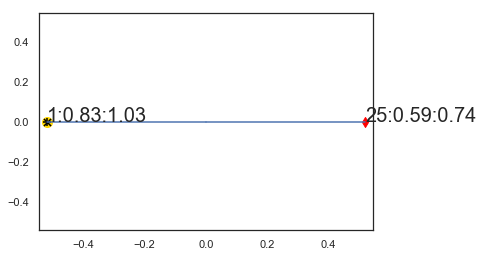

item 176
     u1s  u2s  distances
176   25    1   0.980952


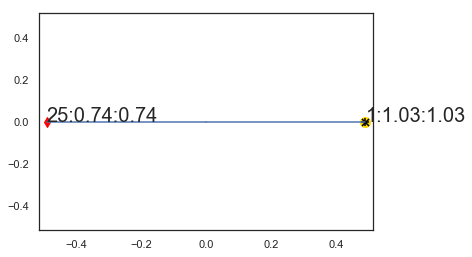

item 177
     u1s  u2s  distances
177    1   25    1.05283


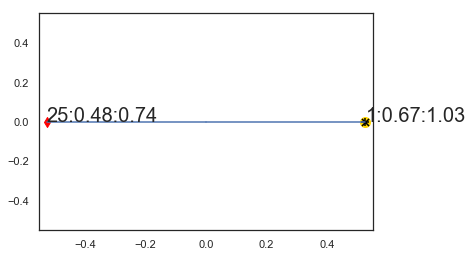

item 178
     u1s  u2s  distances
178    5   16   0.985542
179    5   10   1.035294
180   16   10   0.776471


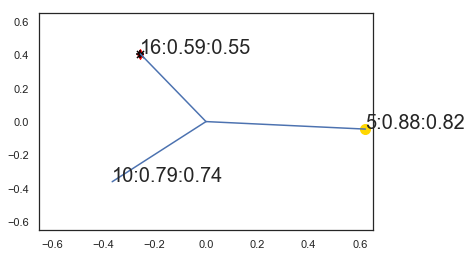

item 179
     u1s  u2s  distances
181    5   16   1.036842
182    5   10   1.052991
183   16   10   0.839316


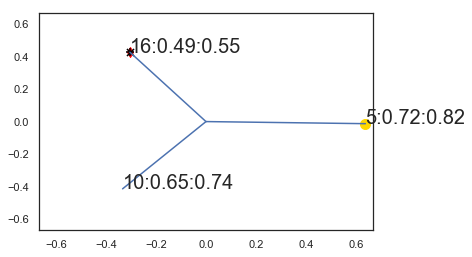

item 180
     u1s  u2s  distances
184   16   17   0.957143


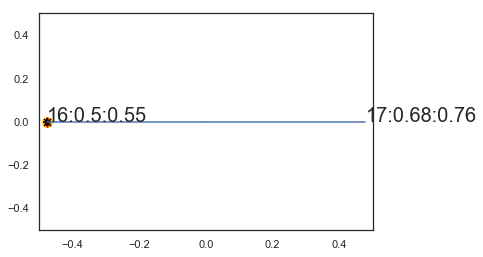

item 181
     u1s  u2s  distances
185   17   16   0.840741


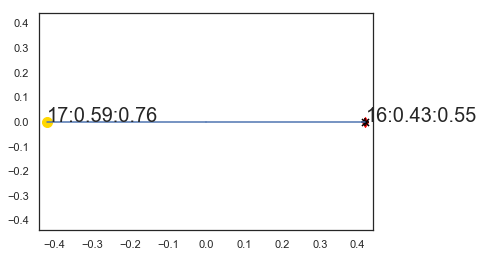

item 182
     u1s  u2s  distances
186   16   17   1.004762


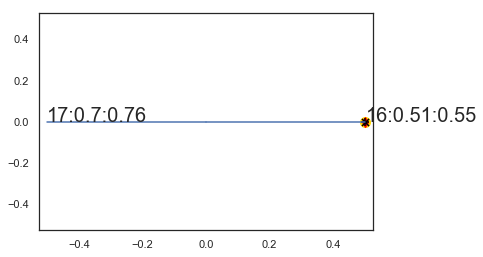

item 183
     u1s  u2s  distances
187   24   16       0.56


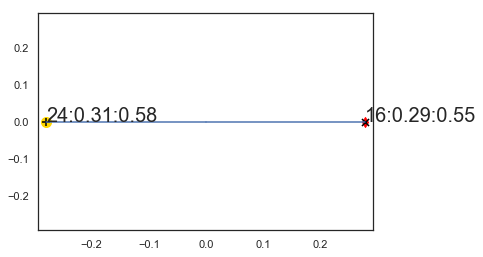

item 184
     u1s  u2s  distances
188   16   24        1.1


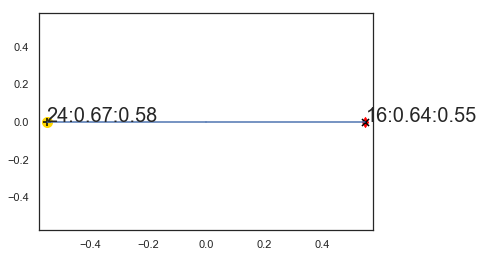

item 185
     u1s  u2s  distances
189   24   16        0.1


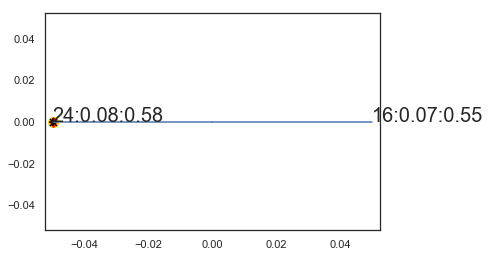

item 186
     u1s  u2s  distances
190   24   16   0.369231


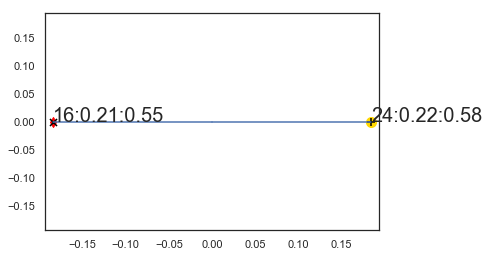

item 187
     u1s  u2s  distances
191   16   24        0.1


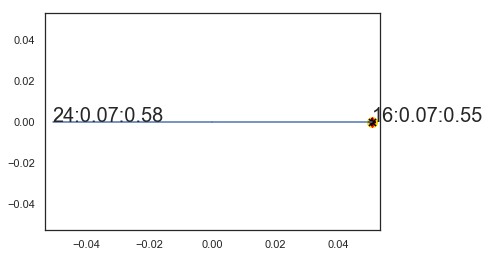

item 188
     u1s  u2s  distances
192   24   16        0.1


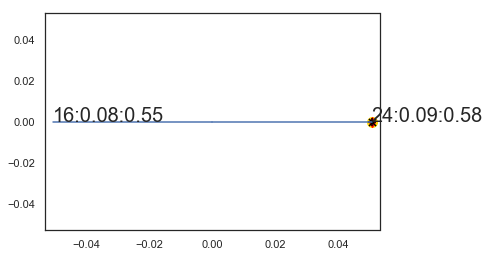

item 189
     u1s  u2s  distances
193   21   23    0.97931


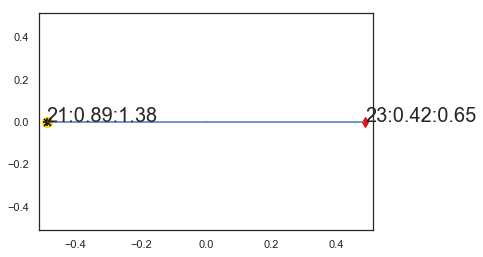

item 190
     u1s  u2s  distances
194   21   23   0.863158


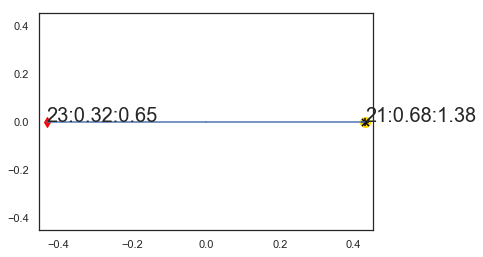

item 191
     u1s  u2s  distances
195   21   23   0.906452


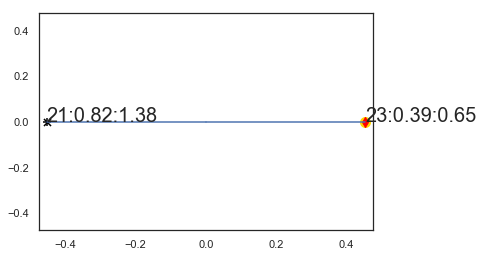

item 192
     u1s  u2s  distances
196   21   23   0.977778


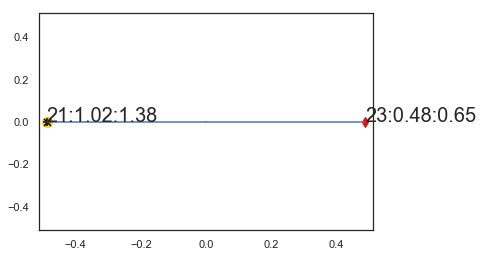

item 193
     u1s  u2s  distances
197   23   21   0.930189


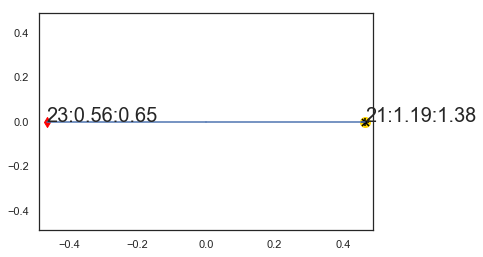

item 194
     u1s  u2s  distances
198   23   21   0.930189


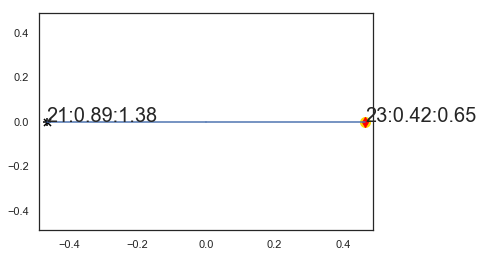

item 195
     u1s  u2s  distances
199   21   23   0.841379


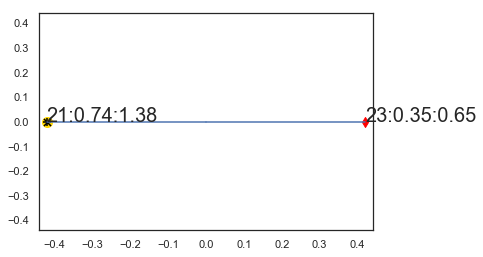

item 196
     u1s  u2s  distances
200   21   23   0.929787


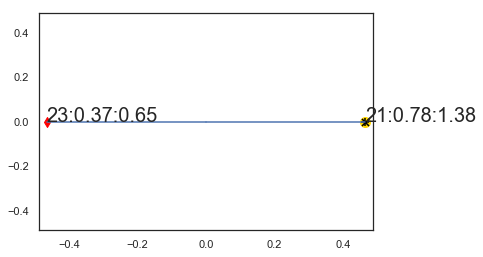

item 197
     u1s  u2s  distances
201   21   23   0.947826


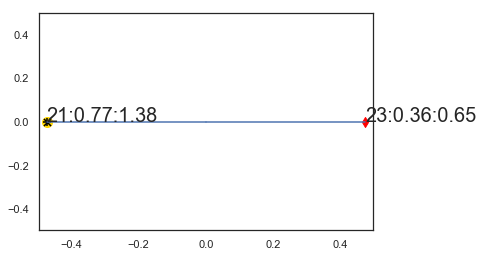

item 198
     u1s  u2s  distances
202   21   23   1.047368


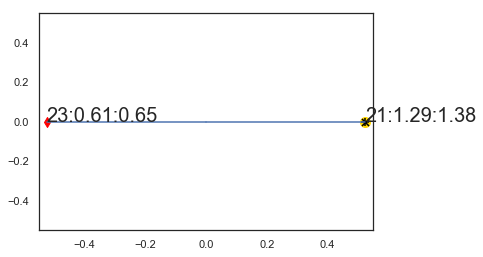

item 199
     u1s  u2s  distances
203    3    9   0.982353


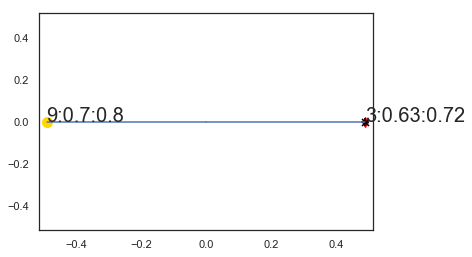

item 200
     u1s  u2s  distances
204    9    3   1.064912


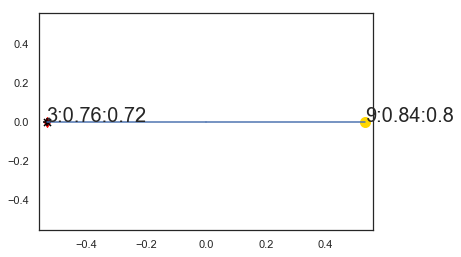

item 201
     u1s  u2s  distances
205    9    3   0.919149


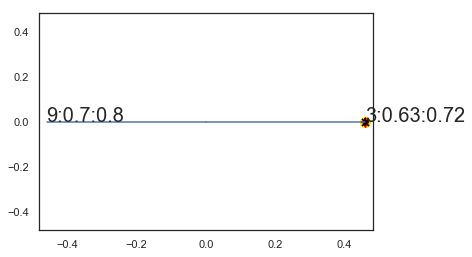

item 202
     u1s  u2s  distances
206    9    3   1.062963


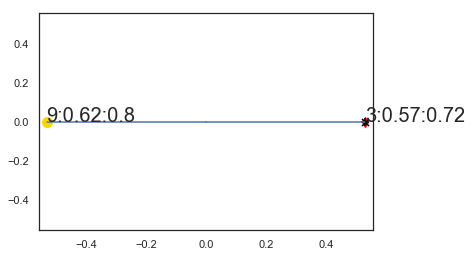

item 203
     u1s  u2s  distances
207    9    3   1.054545


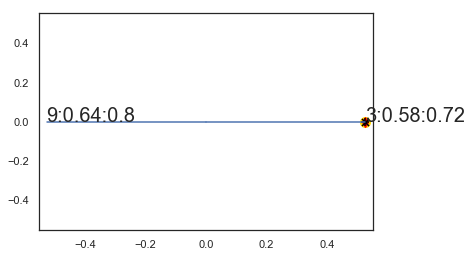

item 204
     u1s  u2s  distances
208    1    7   1.071831


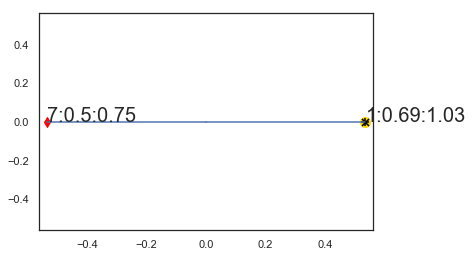

item 205
     u1s  u2s  distances
209    1    7   1.086667


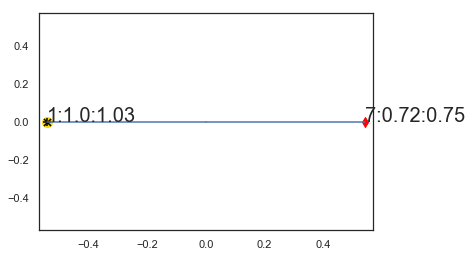

item 206
     u1s  u2s  distances
210    7    1   1.092063


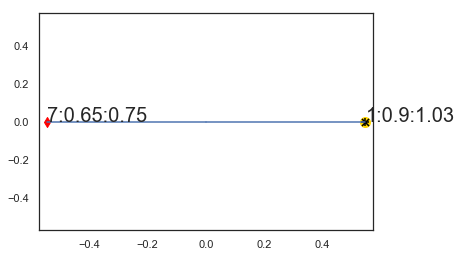

item 207
     u1s  u2s  distances
211    7    1        1.1


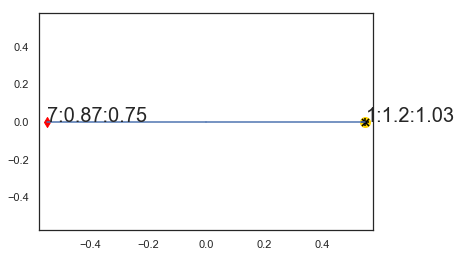

item 208
     u1s  u2s  distances
212    1    7        1.1


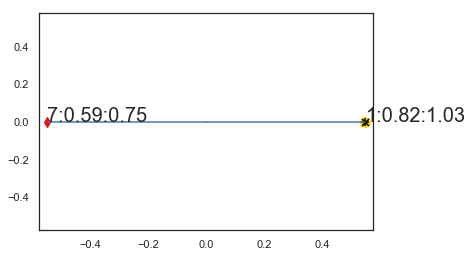

item 209
     u1s  u2s  distances
213    1    7   1.083051


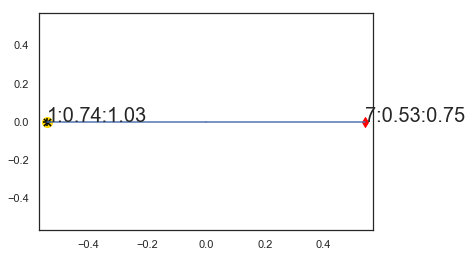

item 210
     u1s  u2s  distances
214   20    3   1.023077


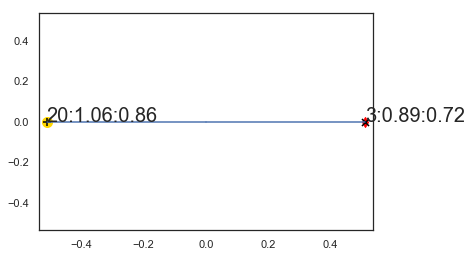

item 211
     u1s  u2s  distances
215    3   20   1.047368


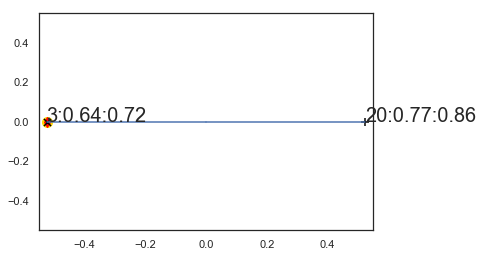

item 212
     u1s  u2s  distances
216   20    3   1.061538


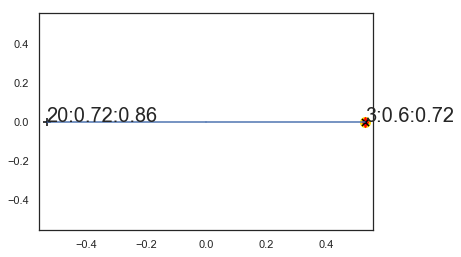

item 213
     u1s  u2s  distances
217    3   20   1.023077


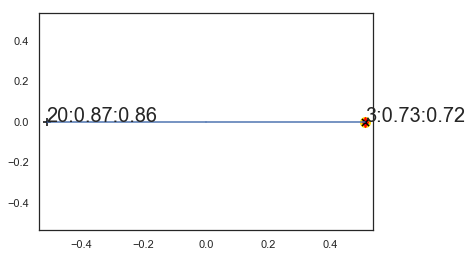

item 214
     u1s  u2s  distances
218    3   20   1.041176


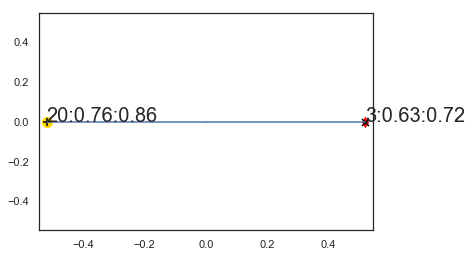

item 215
     u1s  u2s  distances
219    3    1   1.029752


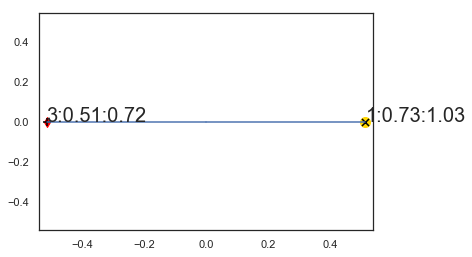

item 216
     u1s  u2s  distances
220    3    1   1.073684


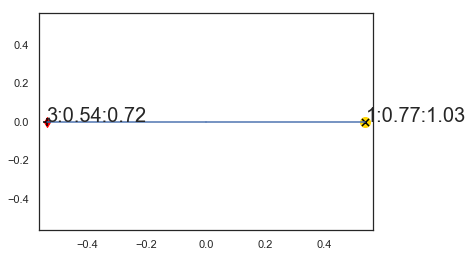

item 217
     u1s  u2s  distances
221    3    1   1.019355


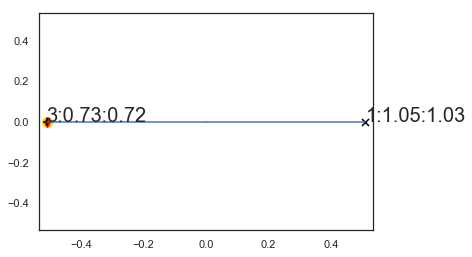

item 218
     u1s  u2s  distances
222    1    3   1.014286


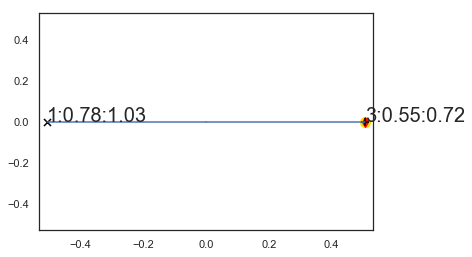

item 219
     u1s  u2s  distances
223    3    1   1.083871


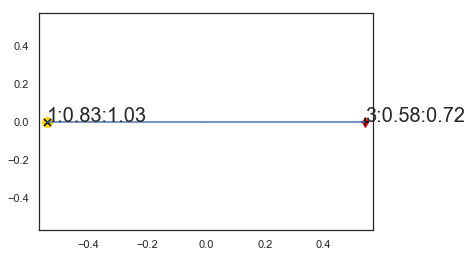

item 220
     u1s  u2s  distances
224    1   16   0.915789


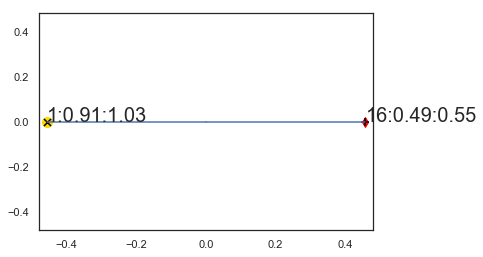

item 221
     u1s  u2s  distances
225    1   16   1.076744


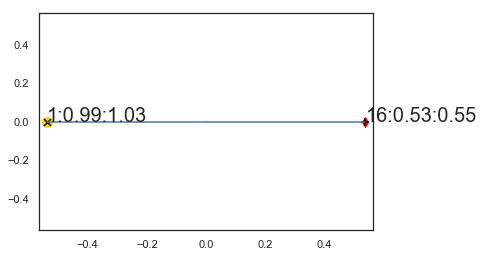

item 222
     u1s  u2s  distances
226   16    1   1.054545


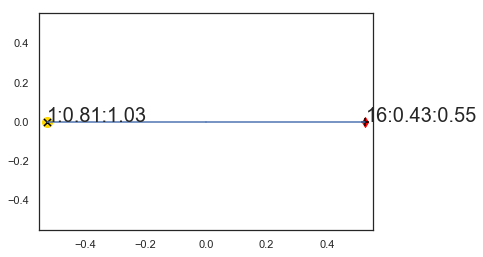

item 223
     u1s  u2s  distances
227   16    1        1.1


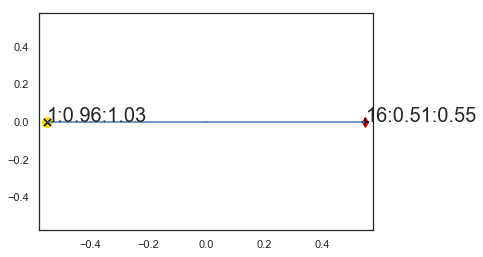

item 224
     u1s  u2s  distances
228   16    1   1.021569


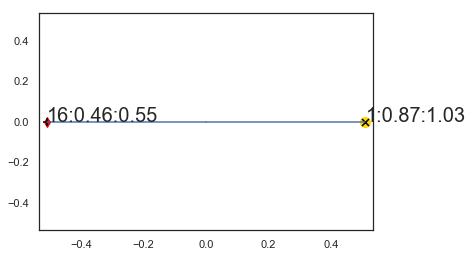

item 225
     u1s  u2s  distances
229   16    1   1.048718


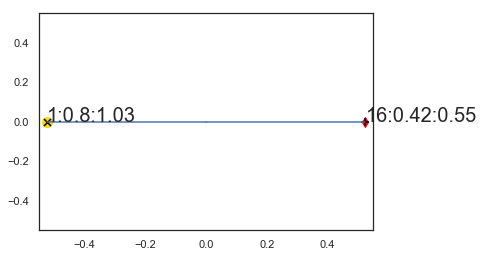

item 226
     u1s  u2s  distances
230   16   24   0.181967


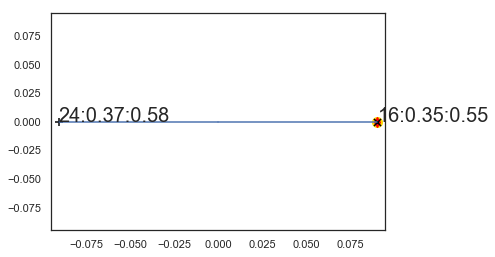

item 227
     u1s  u2s  distances
231   16   24   0.997959


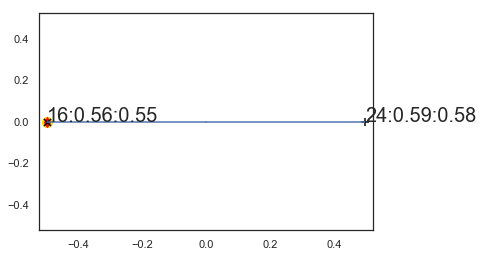

item 228
     u1s  u2s  distances
232   16   24   0.766667


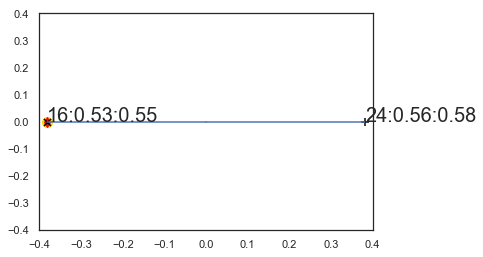

item 229
     u1s  u2s  distances
233   24   16   1.028571


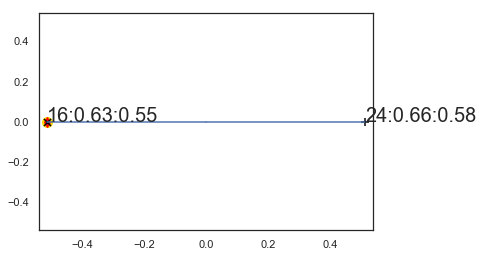

item 230
     u1s  u2s  distances
234   16   24        0.1


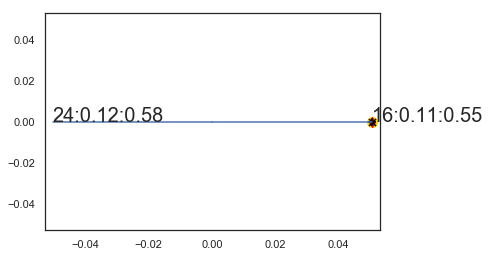

item 231
     u1s  u2s  distances
235   16   24   1.050704


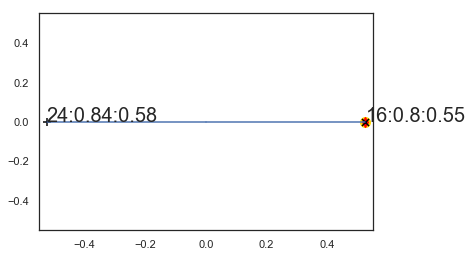

item 241
     u1s  u2s  distances
236   24   19   1.057627


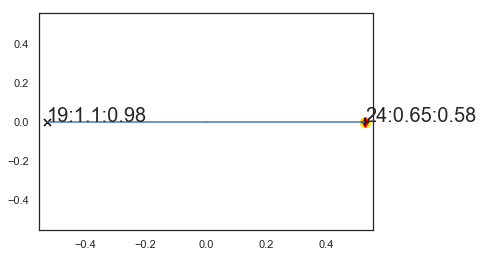

item 242
     u1s  u2s  distances
237   19   24   1.090909


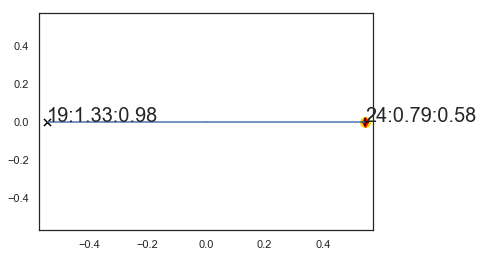

item 243
     u1s  u2s  distances
238   19   24        1.1


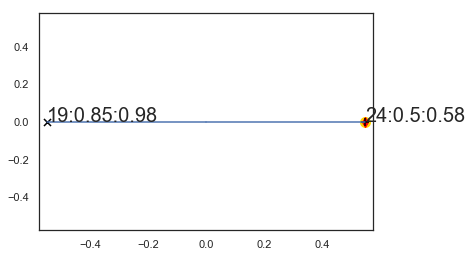

item 244
     u1s  u2s  distances
239   19   24   1.090909


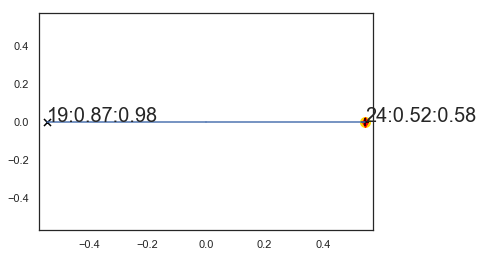

item 245
     u1s  u2s  distances
240   19   24   1.081818


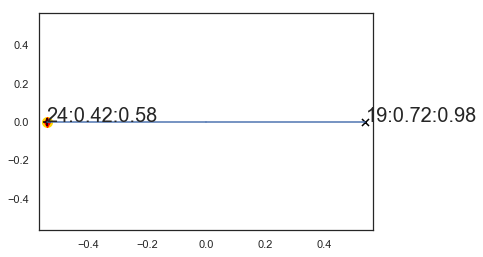

item 246
     u1s  u2s  distances
241   24   19        1.1


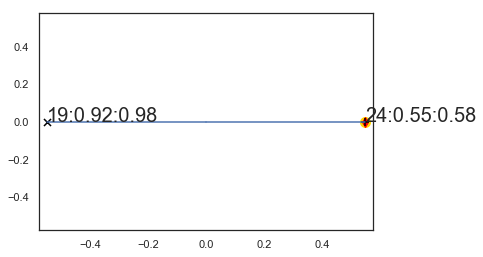

item 247
     u1s  u2s  distances
242   19   24   1.054545


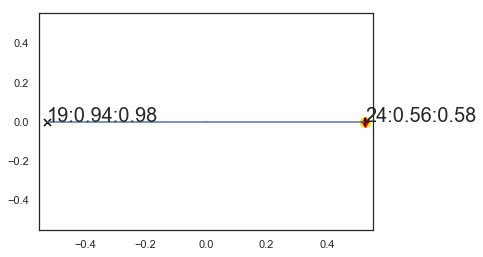

item 250
     u1s  u2s  distances
243    8   19   1.090909


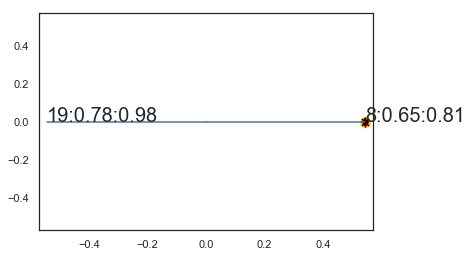

item 251
     u1s  u2s  distances
244    8   19   1.090909


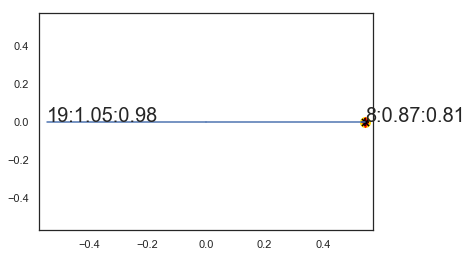

item 252
     u1s  u2s  distances
245   19    8        1.1


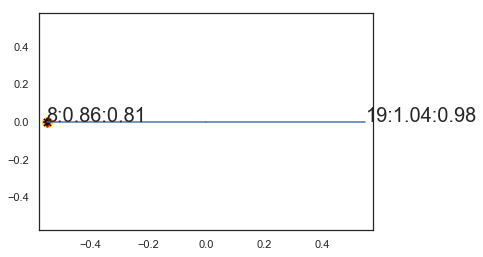

item 253
     u1s  u2s  distances
246    8   19   1.081818


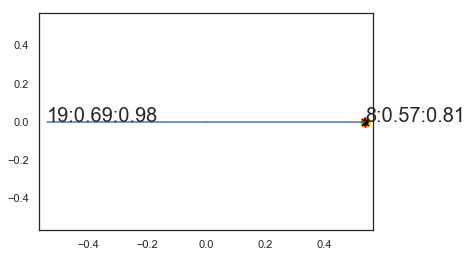

item 254
     u1s  u2s  distances
247    8   19   1.063636


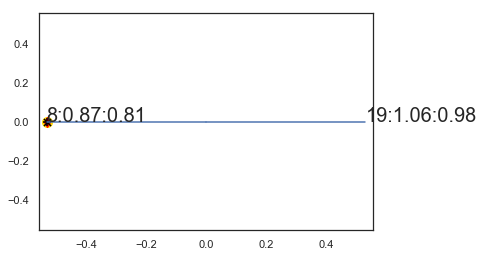

item 255
     u1s  u2s  distances
248   19    8   1.072727


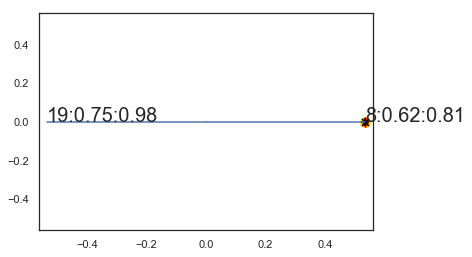

item 256
     u1s  u2s  distances
249    8   19   1.081818


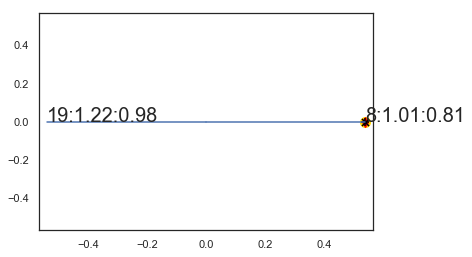

item 257
     u1s  u2s  distances
250   14    8   1.044444


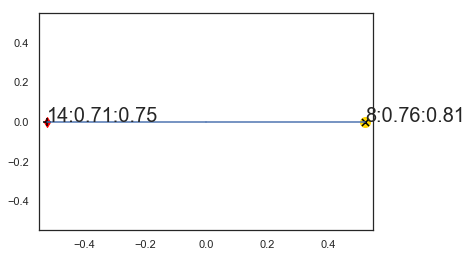

item 258
     u1s  u2s  distances
251   14    8   0.988889


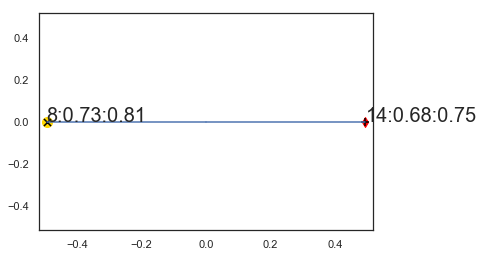

item 259
     u1s  u2s  distances
252    8   14        1.1


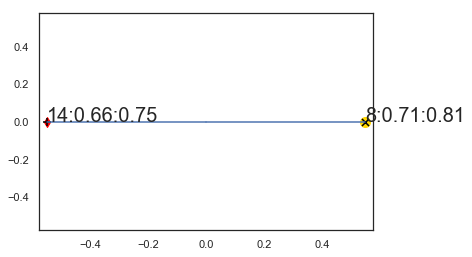

item 260
     u1s  u2s  distances
253   14    8   0.951351


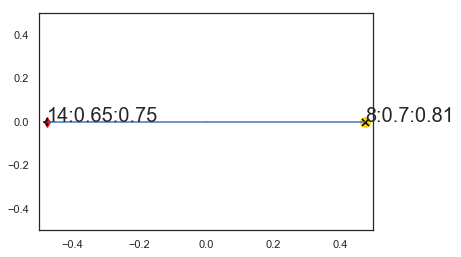

item 261
     u1s  u2s  distances
254   14    8   1.005405


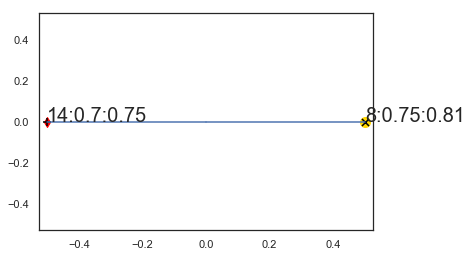

item 262
     u1s  u2s  distances
255   11    3        1.1


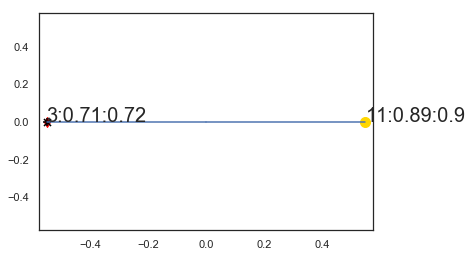

item 263
     u1s  u2s  distances
256    3   11        1.1


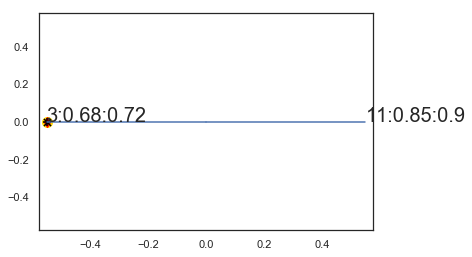

item 264
     u1s  u2s  distances
257    3   11        1.1


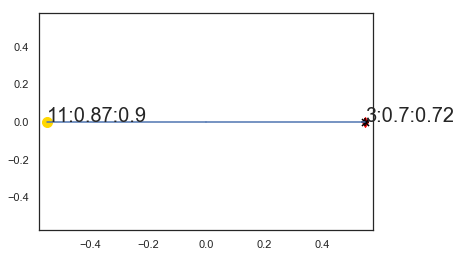

item 265
     u1s  u2s  distances
258   11    3   1.018919


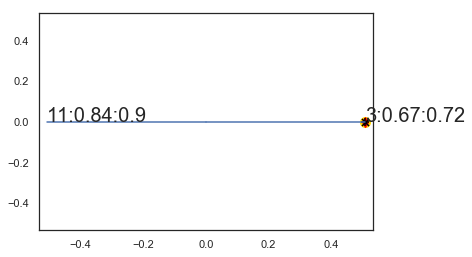

item 266
     u1s  u2s  distances
259   11    3   1.077778


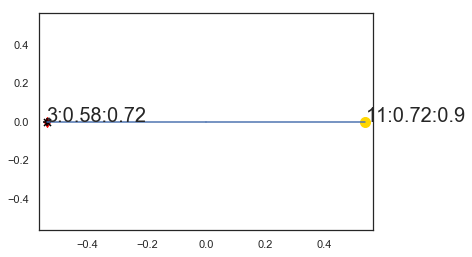

item 267
     u1s  u2s  distances
260   11    3   1.048276


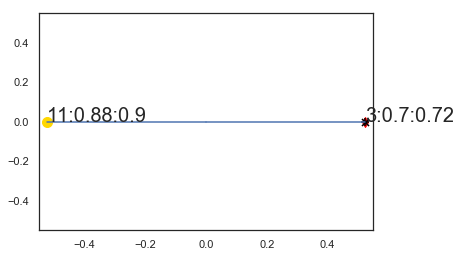

item 268
     u1s  u2s  distances
261   11    3   1.026829


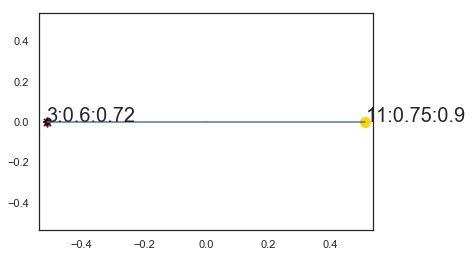

item 269
     u1s  u2s  distances
262    3   11   1.045946


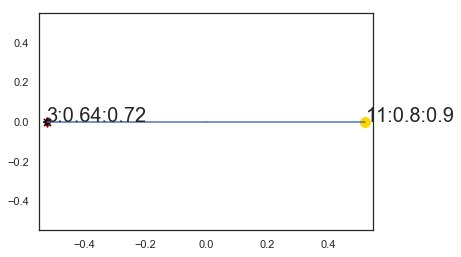

item 270
     u1s  u2s  distances
263    3   11   1.012281


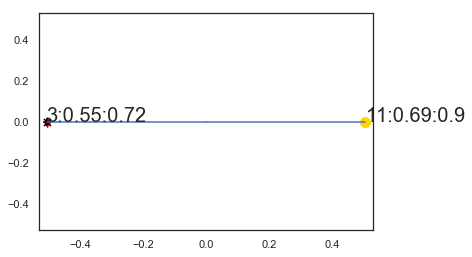

item 271
     u1s  u2s  distances
264   11    3   1.069697


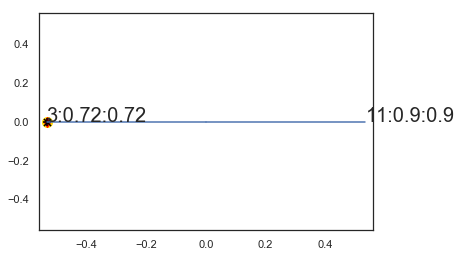

item 272
     u1s  u2s  distances
265   11    3    1.07619


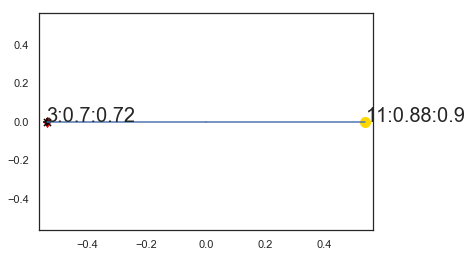

item 275
     u1s  u2s  distances
266   19   21   1.081818


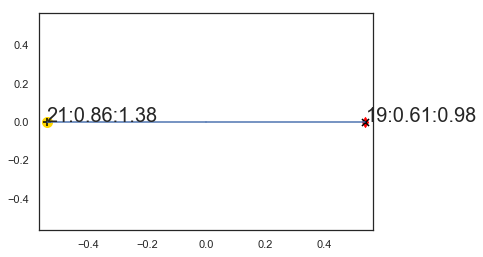

item 276
     u1s  u2s  distances
267   19   21   1.090909


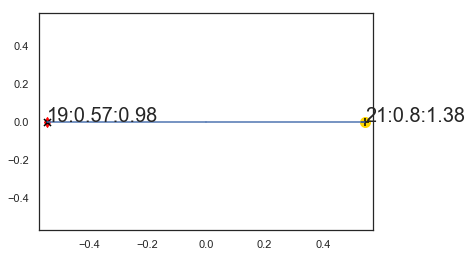

item 277
     u1s  u2s  distances
268   21   19   1.081818


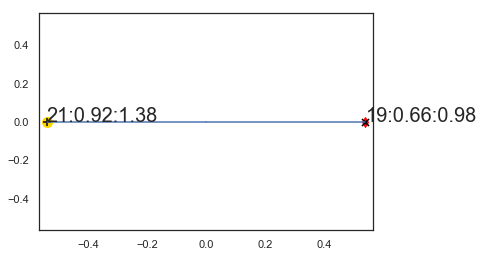

item 278
     u1s  u2s  distances
269   19   21   1.054545


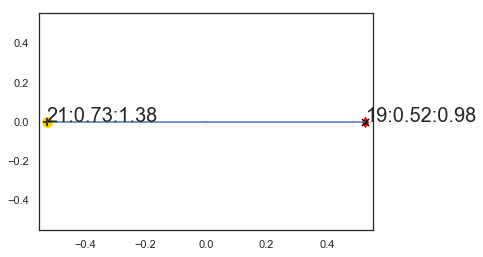

item 279
     u1s  u2s  distances
270   19   21   1.063636


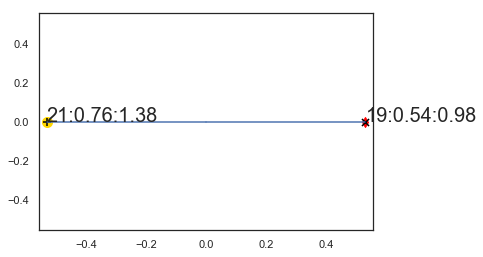

item 280
     u1s  u2s  distances
271   19   21   1.090909


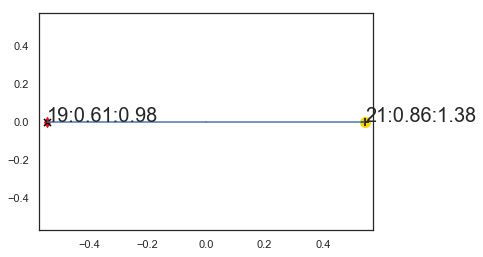

item 281
     u1s  u2s  distances
272   19   21   1.090909


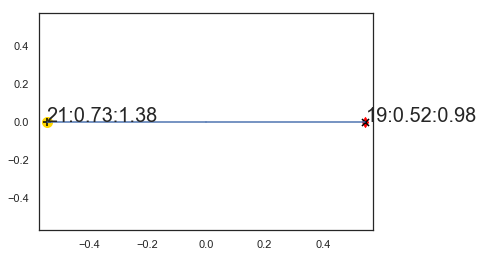

item 284
     u1s  u2s  distances
273   19    9    1.07619


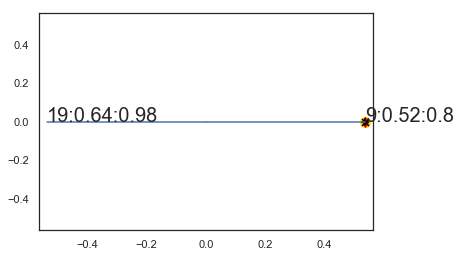

item 285
     u1s  u2s  distances
274    9   19   1.074576


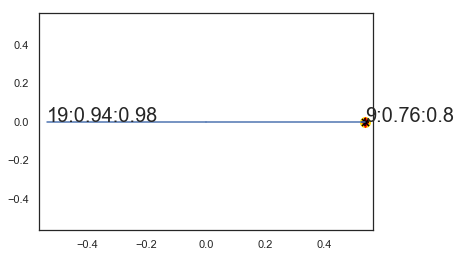

item 286
     u1s  u2s  distances
275    9   19   1.064789


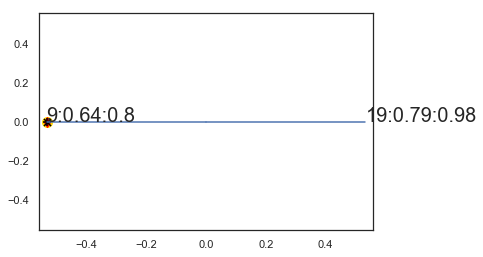

item 287
     u1s  u2s  distances
276    9   19        1.1


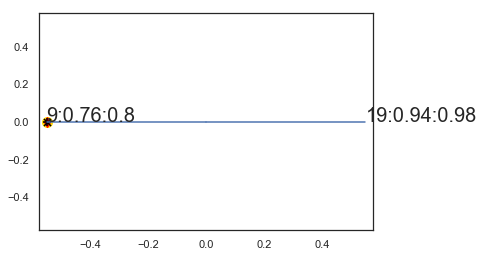

item 288
     u1s  u2s  distances
277    9   19        1.1


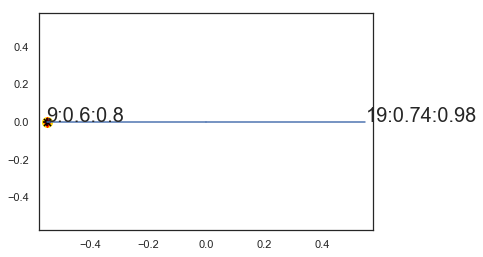

item 289
     u1s  u2s  distances
278    9   19   1.081818


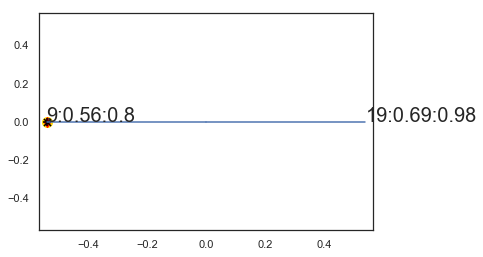

item 290
     u1s  u2s  distances
279   19    9        1.1


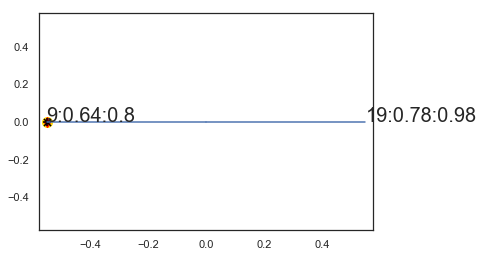

item 291
     u1s  u2s  distances
280   20   13        0.1
281   20   21        0.6
282   13   21        0.6


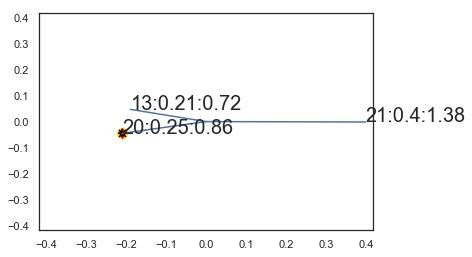

item 292
     u1s  u2s  distances
283   20   13   0.964407
284   20   21   0.998305
285   13   21   0.890909


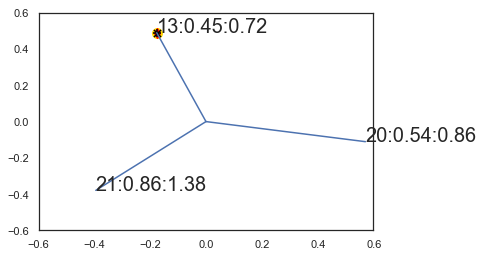

item 293
     u1s  u2s  distances
286   21   20   0.973016
287   21   13   0.817391
288   20   13   0.933333


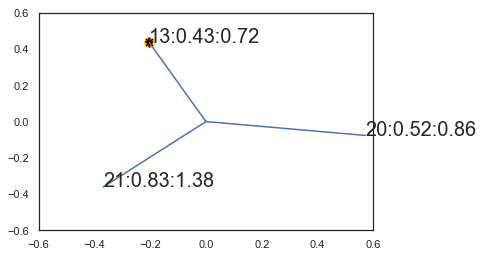

In [215]:
urdu_experiment.debug()

gold eval : BLEU score

In [390]:
crowd_df[crowd_df["label"].isin(model4.values())]

item  \
140                                                                                                                                                                                                                                                                                                        مخلوط تعلیم پر پابندی: طالبان   
149                                                                                                                                                                                                                                                                                        زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔   
141                                                                                         شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری تحصیلوں میں حافظ گل بہادر گروپ کے مقامی طالبان نے ایک پمفلٹ تقسیم کیا ہے جس میں سرکاری اور نیم سرکاری ان تعلیمی اداروں کو دھمکی دی گئی ہے جن میں لڑکوں اور لڑکیوں کو مخلوط تعلیم دی جارہی ہے۔   
142                                                                                                                                                                                                            پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط تعلیمی اداروں کو بند نہیں کیاگیا تو ان کے خلاف کارروائی شروع کردی جائے گی۔   
143                                                                                                                                               پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر تعلیمی امور کے لیے خواتین کے شناختی کارڈ بنوانے پر پابندی ہوگی اور خواتین کو تمام تحصیلوں میں نادرا کے دفاتر پر جانے سے بھی منع کردیا ہے۔   
144                                                                                     مقامی طالبان کی جانب سے خواتین کے شناختی کارڈ بنوانے پر پابندی کا اعلان ایک ایسے موقع پر کیاگیا ہے جب شمالی وزیرستان میں بے نظیرانکم سپورٹ پروگرام کے لیے نادرہ کے دفاتر میں تقریباً دو سو خواتین نے شناختی کارڈ بنوانے کے لیے فارم جمع کیے ہیں۔   
145                                                                                                                                                                                                         مقامی لوگوں کے مطابق طالبان کی جانب سے جاری ہونے والے پمفلٹ کو شمالی وزیرستان کے تمام مساجد کے لاؤڈسپیکر پر پڑھ کر سنایا گیا   
146                                                                                                                                                                                                                                   تاہم خط میں اس بات کا ذکر نہیں کیاگیا ہے کہ لڑکیوں کی الگ تعلیمی ادارے پر بھی پابندی ہوگی یا نہیں۔   
147                                                                                                                                پمفلٹ کے مطابق اس اعلان کے بعد تعلیم حاصل کرنے کے لیے یا شناختی کارڈ بنانے کے لیے کوئی بھی عورت سکول یا نادرا کی آفس گئی تو پکڑنے جانے کی صورت میں اس عورت اور اس کے اہل خانہ کو شرعی سزا دی جائے گی۔   
148                                                                                                                                                                 اس کے علاوہ ضلع بنوں میں پولیس کا کہنا ہے کہ اتوار کو بنوں میرانشاہ روڈ پر ایک بارودی سرنگ کا دھماکہ ہوا ہے جس کے نتیجہ میں ایک راہ گیر ہلاک جبکہ ایک زخمی ہوگیا ہے۔   
108                                                                                                                                                                                                                                                                                                    140 سالہ، نو کلو وزنی لابسٹر آزاد   
109                                                                                                                                                                                                                                                                     ’جارج دی جائنٹ لابسٹر‘ کو دو ہفتے قبل ایک سمندر سے پکڑا گیا تھا۔   
101     

In [391]:
(crowd_df[crowd_df["label"].isin(random.values())].status=="Approved").mean()

0.5195195195195195

In [392]:
(crowd_df[crowd_df["label"].isin(model4.values())].status=="Approved").mean()

0.5709677419354838

Reason this is pretty mild:
Random basically imitates having one user label per item. The more redundancy you have the better you should expect to do versus random. In this experiment the amount of redundancy is minimal, so not THAT much better than random.

In [29]:
sddf = pd.DataFrame(stan_data)
sddf = sddf.rename(columns={"items":"itemID", "u1s":"worker1", "u2s":"worker2", "distances":"distance"})
sddf = sddf[["itemID","worker1","worker2","distance"]]
tmpdist = sddf[sddf.itemID>290]

In [28]:
tmp = crowd_df[["itemID", "worker", "label"]]
tmp2 = tmp[tmp.itemID>290]

In [33]:
tmpdist.groupby("itemID","wo")

itemID  worker1  worker2  distance
280     291       20       13  0.703248
281     291       20       21  0.386507
282     291       13       21  0.386507
283     292       20       13  0.276478
284     292       20       21  0.250495
285     292       13       21  0.264749
286     293       21       20  0.231979
287     293       21       13  0.298633
288     293       20       13  0.268575

In [37]:
discol = "worker:"
tmpdist = sddf[sddf.itemID>290].rename(columns={"distance":discol})
def thing(tmpdist):
    s1 = tmpdist.groupby("worker1").sum()[discol]
    s2 = tmpdist.groupby("worker2").sum()[discol]
    n1 = tmpdist.groupby("worker1").count()[discol]
    n2 = tmpdist.groupby("worker2").count()[discol]
    return s1.add(s2, fill_value=0) / n1.add(n2, fill_value=0)
tmpdist.groupby("itemID").apply(thing)

worker:        13        20        21
itemID                               
291      0.544878  0.544878  0.386507
292      0.270614  0.263487  0.257622
293      0.283604  0.250277  0.265306

In [51]:
tmpdist = sddf[sddf.itemID>290].rename(columns={"worker1":"worker:"})
discol = "distance"
s1 = tmpdist.groupby("worker:").sum()[discol]
s2 = tmpdist.groupby("worker2").sum()[discol]
n1 = tmpdist.groupby("worker:").count()[discol]
n2 = tmpdist.groupby("worker2").count()[discol]
tmpdf = s1.add(s2, fill_value=0) / n1.add(n2, fill_value=0)

discol = "worker:"
tmpdist = sddf[sddf.itemID>290].rename(columns={"distance":discol})
def thing(tmpdist):
    return tmpdf
tmpdist.groupby("itemID").apply(thing)

worker:        13       20        21
itemID                              
291      0.366365  0.35288  0.303145
292      0.366365  0.35288  0.303145
293      0.366365  0.35288  0.303145

In [43]:
tmpdf.rename(index={"worker1":"1"})

worker1
13    0.366365
20    0.352880
21    0.303145
Name: distance, dtype: float64